# RFP: Betting on the Bachelor

## Project Overview
You are invited to submit a proposal that answers the following question:

### Who will win season 29 of the Bachelor?

*All proposals must be submitted by **1/15/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, read in the data you plan on using to train and test your model. Call `info()` once you have read the data into a dataframe. Consider using some or all of the following sources:
- [Scrape Fandom Wikis](https://bachelor-nation.fandom.com/wiki/The_Bachelor) or [the official Bachelor website]('https://bachelornation.com/shows/the-bachelor/')
- [Ask ChatGPT to genereate it](https://chatgpt.com/)
- [Read in csv files like this](https://www.kaggle.com/datasets/brianbgonz/the-bachelor-contestants?select=contestants.csv)

*Note, a level 5 dataset contains at least 1000 rows of non-null data. A level 4 contains at least 500 rows of non-null data.*

In [33]:
import requests
import seaborn as sns
import pandas as pd
import time
from bs4 import BeautifulSoup
pastsets = {'Name':[], 
           'Age': [],
            'Home town':[],
           'Occupation': [],
           'Outcome': [],
           'Season': []}

pain=[]
doublepain=[]
for i in range(1, 28):
    url=f'https://en.wikipedia.org/wiki/The_Bachelor_(American_TV_series)_season_{i}'
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable sortable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    outcome = cells[4].text.strip() if len(cells) > 4 else "N/A"
                    place = cells[5].text.strip() if len(cells) > 5 else "N/A"
                    if name == 'N/A':
                        continue
                    else:
                        pastsets['Name'].append(name)
                        pastsets['Age'].append(age)
                        pastsets['Home town'].append(hometown)
                        pastsets['Occupation'].append(occupation)
                        pastsets['Outcome'].append(outcome)
                        pastsets['Season'].append(i)
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
df = pd.DataFrame(pastsets)
df.info()
print("pains:", pain)
df.head()
# Don't forget to call info()!

no table
no table
no table
no table
no table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        613 non-null    object
 1   Age         613 non-null    object
 2   Home town   613 non-null    object
 3   Occupation  613 non-null    object
 4   Outcome     613 non-null    object
 5   Season      613 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 28.9+ KB
pains: []


,Name,Age,Home town,Occupation,Outcome,Season
0,Amanda Marsh,23,"Chanute, Kansas",Event Planner,Winner,1
1,Trista Rehn,29,"St. Louis, Missouri",Miami Heat Dancer,Runner-up,1
2,Shannon Oliver,24,"Dallas, Texas",Financial Management Consultant,Week 5,1
3,Kimberly Karels,24,"Tempe, Arizona",Nanny,Week 4,1
4,Cathy Grimes,22,"Terre Haute, Indiana",Graduate Student,Week 3,1


In [34]:
for i in range(1, 9):
    url=f'https://en.wikipedia.org/wiki/The_Bachelor_(Australian_TV_series)_season_{i}'
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    outcome = cells[4].text.strip() if len(cells) > 4 else "N/A"
                    if name == 'N/A':
                        continue
                    else:
                        pastsets['Name'].append(name)
                        pastsets['Age'].append(age)
                        pastsets['Home town'].append(hometown)
                        pastsets['Occupation'].append(occupation)
                        pastsets['Outcome'].append(outcome)
                        pastsets['Season'].append(i+40)
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
df = pd.DataFrame(pastsets)
df.info()
print("pains:", pain)
df.head()
print(f'\n{df.tail()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        816 non-null    object
 1   Age         816 non-null    object
 2   Home town   816 non-null    object
 3   Occupation  816 non-null    object
 4   Outcome     816 non-null    object
 5   Season      816 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 38.4+ KB
pains: []

                    Name Age                 Home town  \
811        Georgie Glass  32          Hobart, Tasmania   
812      Leilani Vakaahi  27  Forster, New South Wales   
813  Marlaina McPhillips  31       Melbourne, Victoria   
814         Nadine Kodsi  30       Melbourne, Victoria   
815          Paige Royal  31       Melbourne, Victoria   

                  Occupation    Outcome  Season  
811          Project Manager  Episode 3      48  
812     Partnerships Manager        N/A      48  
813  Fundraisin

In [35]:

for i in range(1, 3):
    url=f'https://en.wikipedia.org/wiki/The_Bachelor_Canada_season_{i}'
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    outcome = cells[4].text.strip() if len(cells) > 4 else "N/A"
                    if name == 'N/A':
                        continue
                    else:
                        pastsets['Name'].append(name)
                        pastsets['Age'].append(age)
                        pastsets['Home town'].append(hometown)
                        pastsets['Occupation'].append(occupation)
                        pastsets['Outcome'].append(outcome)
                        pastsets['Season'].append(i+50)
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
df = pd.DataFrame(pastsets)
df.info()
print("pains:", pain)
df.head()
print(f'\n{df.tail()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        864 non-null    object
 1   Age         864 non-null    object
 2   Home town   864 non-null    object
 3   Occupation  864 non-null    object
 4   Outcome     864 non-null    object
 5   Season      864 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 40.6+ KB
pains: []

              Name Age                                   Home town  \
859  Kelsey Palmer  28                            Calgary, Alberta   
860  Raelee Fedyna  26                            Calgary, Alberta   
861  Ritiuska Leon  33  Puerto Ordaz, Venezuela / Calgary, Alberta   
862   Sarah Barber  31                     St. Catharines, Ontario   
863  Sharan Garcha  23                 Vancouver, British Columbia   

                  Occupation    Outcome  Season  
859                Sommelier  Episode 1    

In [36]:

for i in range(1, 3):
    url=f'https://en.wikipedia.org/wiki/The_Bachelor_(Greek_TV_series)_season_{i}'
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    outcome = cells[4].text.strip() if len(cells) > 4 else "N/A"
                    if name == 'N/A':
                        continue
                    else:
                        pastsets['Name'].append(name)
                        pastsets['Age'].append(age)
                        pastsets['Home town'].append(hometown)
                        pastsets['Occupation'].append(occupation)
                        pastsets['Outcome'].append(outcome)
                        pastsets['Season'].append(i+60)
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
df = pd.DataFrame(pastsets)
df.info()
print("pains:", pain)
df.head()
print(f'\n{df.tail()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        911 non-null    object
 1   Age         911 non-null    object
 2   Home town   911 non-null    object
 3   Occupation  911 non-null    object
 4   Outcome     911 non-null    object
 5   Season      911 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 42.8+ KB
pains: []

                  Name Age Home town                            Occupation  \
906  Irene Katsigianni  19    Athens  Primary and Community Health Student   
907    Valeria Merakou  28    Athens                                Author   
908             Laoura  19    Rhodes                             Bartender   
909        Dora Kinali  22    Serres                                Dancer   
910   Lena Nikolarakou  22   Trikala                              Aclogist   

    Outcome  Season  
906  Week 1      62  
9

In [37]:

for i in range(1, 3):
    url=f'https://en.wikipedia.org/wiki/The_Bachelor_New_Zealand_season_{i}'
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    outcome = cells[4].text.strip() if len(cells) > 4 else "N/A"
                    if name == 'N/A':
                        continue
                    else:
                        pastsets['Name'].append(name)
                        pastsets['Age'].append(age)
                        pastsets['Home town'].append(hometown)
                        pastsets['Occupation'].append(occupation)
                        pastsets['Outcome'].append(outcome)
                        pastsets['Season'].append(i+70)
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
df = pd.DataFrame(pastsets)
df.info()
print("pains:", pain)
df.head()
print(f'\n{df.tail()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        955 non-null    object
 1   Age         955 non-null    object
 2   Home town   955 non-null    object
 3   Occupation  955 non-null    object
 4   Outcome     955 non-null    object
 5   Season      955 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 44.9+ KB
pains: []

                                 Name Age     Home town  \
950  Metotisi "Metz" Komiti-Faalavaau  28      Auckland   
951                     Catherine Lum  26      Auckland   
952                        Emily Rose  33      Auckland   
953                       Freya Jones  26  Christchurch   
954                      Harmony Moki  27      Auckland   

                     Occupation         Outcome  Season  
950               Administrator  Quit Episode 3      72  
951  Ambulance customer service       Episo

In [38]:

for i in range(1):
    url="https://en.wikipedia.org/wiki/The_Bachelor_(Brazilian_TV_series)"
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    outcome = cells[4].text.strip() if len(cells) > 4 else "N/A"
                    if name == 'N/A':
                        continue
                    else:
                        pastsets['Name'].append(name)
                        pastsets['Age'].append(age)
                        pastsets['Home town'].append(hometown)
                        pastsets['Occupation'].append(occupation)
                        pastsets['Outcome'].append(outcome)
                        pastsets['Season'].append(i+80)
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
df = pd.DataFrame(pastsets)
df.info()
print("pains:", pain)
df.head()
print(f'\n{df.tail()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        980 non-null    object
 1   Age         980 non-null    object
 2   Home town   980 non-null    object
 3   Occupation  980 non-null    object
 4   Outcome     980 non-null    object
 5   Season      980 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 46.1+ KB
pains: []

                Name Age              Home town                Occupation  \
975    Letícia Mello  20  São Bernardo do Campo  Public relations student   
976  Michelle Mignon  26                Uberaba                     Model   
977     Nanny Correa  30           Bom Despacho                        DJ   
978    Suzy Pianista  33              São Paulo                   Pianist   
979  Viviane Pereira  27         Jaraguá do Sul         Real estate agent   

    Outcome  Season  
975     N/A      80  
976    

In [39]:

for i in range(5,6):
    url=f"https://en.wikipedia.org/wiki/The_Bachelor_(British_TV_series)_series_{i}"
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    outcome = cells[4].text.strip() if len(cells) > 4 else "N/A"
                    if name == 'N/A':
                        continue
                    else:
                        pastsets['Name'].append(name)
                        pastsets['Age'].append(age)
                        pastsets['Home town'].append(hometown)
                        pastsets['Occupation'].append(occupation)
                        pastsets['Outcome'].append(outcome)
                        pastsets['Season'].append(i+90)
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
df = pd.DataFrame(pastsets)
df.info()
print("pains:", pain)
df.head()
print(f'\n{df.tail()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1004 non-null   object
 1   Age         1004 non-null   object
 2   Home town   1004 non-null   object
 3   Occupation  1004 non-null   object
 4   Outcome     1004 non-null   object
 5   Season      1004 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.2+ KB
pains: []

               Name Age      Home town              Occupation    Outcome  \
999     Rachel Boon  24         Surrey             Childminder  Episode 1   
1000   Rebecca Rock  25  Hertfordshire          Hair Colourist  Episode 1   
1001    Sophia Port  25         London              Finance PA  Episode 1   
1002  Sarah Stewart  21     Nottingham                 Student  Episode 1   
1003  Victoria Ebel  23      Guildford  Health Care Technician  Episode 1   

      Season  
999       95  
1000      95  
1001

### 2. Training Your Model
In the cell seen below, write the code you need to train a linear regression model. Make sure you display the equation of the plane that best fits your chosen data at the end of your program. 

*Note, level 5 work trains a model using only the standard Python library and Pandas. A level 5 model is trained with at least two features, where one of the features begins as a categorical value (e.g. occupation, hometown, etc.). A level 4 uses external libraries like scikit or numpy.*

In [40]:
print(df['Outcome'].unique())


['Winner' 'Runner-up' 'Week 5' 'Week 4' 'Week 3' 'Week 2' 'Week 1'
 'Week 6' 'Week 2 (Quit)' 'Week 7' 'N/A' 'Week 8' 'Co-runners-up' '9'
 'Runner-Up' '12' '15 (quit)' '8' '15 (DQ)' 'Week 9' '6' '11' '17 (quit)'
 '8 (DQ)' '13' '16 (quit)' '16' '19 (quit)' '6 (quit)' '18' '15' '' '14'
 '21 (quit)' '22' '7 (quit)' '10' '17' '3' '7' '10 (quit)' '13 (quit)'
 '19' '17–19' '20' 'Runner-Up(Week 10)' '29 (quit)' '30' 'Episode 12'
 'Episode 11' 'Episode 10' 'Episode 9' 'Episode 8' 'Episode 7' 'Episode 6'
 'Episode 5' 'Episode 4' 'Episode 3' 'Episode 2' 'Episode 2 (Quit)'
 'Episode 1' 'Episode 19' 'Episode 18' 'Episode 16' 'Episode 15'
 'Episode 14' 'Episode 13' 'Episode 4 (Quit)' 'Episode 9 (Quit)'
 'Episode 7 (quit)' 'Episode 1 (quit)' 'Episode 10 (quit)'
 'Episode 15 (quit)' 'Episode 8 (quit)' 'Episode 10 (Quit)'
 'Episode 5 (quit)' 'Episode 4 (quit)' 'Quit Episode 10' 'Quit Episode 3'
 'Quit Episode 1' 'Quit Episode 8' 'Week 12' 'Week 11' 'Week 10']


In [41]:
print(df['Occupation'].unique())
occupationnumber= {'occupation':[], 'number':[]}
for i, occupation in enumerate(df['Occupation'].unique()):
    occupationnumber['occupation'].append(occupation)
    occupationnumber['number'].append(i)
occupationnumber=pd.DataFrame(occupationnumber)
occupationnumber.head()

['Event Planner' 'Miami Heat Dancer' 'Financial Management Consultant'
 'Nanny' 'Graduate Student' 'Attorney' 'Actress'
 'Commercial Real Estate Agent' 'Special Ed. Teacher'
 'Production Coordinator' 'Hooters Waitress' 'Power Tool Sales Rep.'
 'Photographer' 'Business Development Director' 'Neuropsychologist'
 'Doctor' 'Bar Manager' 'Retail Manager' 'Advertising Executive'
 'Insurance Representative' '6th Grade Teacher' 'Technology Specialist'
 'School Psychologist' 'College Student' 'Executive Recruiter'
 'Registered Nurse' 'Flight Attendant' 'Assistant Financial Advisor'
 'Marriage Therapy Trainee' 'Airline Supervisor' 'Graphic Artist'
 'Radio Sales' 'Publications Quality Control' 'Strategic Planning Analyst'
 'Psychologist' '3rd Grade Teacher' 'Radiological Technologist'
 'Interior Designer' 'Paralegal' 'Former NBA Cheerleader'
 '1st Grade Teacher' 'Communications Specialist' 'Student'
 'General Contractor' 'Architect Designer' 'Model'
 'Pharmaceutical Salesperson' 'Prosthetic Techn

,occupation,number
0,Event Planner,0
1,Miami Heat Dancer,1
2,Financial Management Consultant,2
3,Nanny,3
4,Graduate Student,4


In [42]:
df['occnum']=None
for i, player in df.iterrows():
    occupation = player['Occupation']
    assignment = occupationnumber[occupationnumber['occupation'] == occupation]
    df.loc[i, 'occnum']=assignment['number'].values[0]
df['occnum']=pd.to_numeric(df['occnum'], errors='coerce')
print(f'\nInfo')
df.info()
print(f'\nHead')
df.head()



Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1004 non-null   object
 1   Age         1004 non-null   object
 2   Home town   1004 non-null   object
 3   Occupation  1004 non-null   object
 4   Outcome     1004 non-null   object
 5   Season      1004 non-null   int64 
 6   occnum      1004 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 55.0+ KB

Head


,Name,Age,Home town,Occupation,Outcome,Season,occnum
0,Amanda Marsh,23,"Chanute, Kansas",Event Planner,Winner,1,0
1,Trista Rehn,29,"St. Louis, Missouri",Miami Heat Dancer,Runner-up,1,1
2,Shannon Oliver,24,"Dallas, Texas",Financial Management Consultant,Week 5,1,2
3,Kimberly Karels,24,"Tempe, Arizona",Nanny,Week 4,1,3
4,Cathy Grimes,22,"Terre Haute, Indiana",Graduate Student,Week 3,1,4


In [43]:
import math

print(df['Outcome'].unique())

df['outnum'] = None

df['Outcome'] = df['Outcome'].str.lower()

for i, player in df.iterrows():
    outcome = player['Outcome']
    outcome = outcome.replace("week ", "")
    outcome = outcome.replace("(quit)", "")
    outcome = outcome.replace("(dq)", "")
    outcome = outcome.replace("(DQ)", "")
    outcome = outcome.replace("(Quit)", "")
    outcome = outcome.replace("episode", "")
    outcome = outcome.replace("quit", "")
    outcome = outcome.replace(" ", "")

    if "in" in outcome:
        df.loc[i, 'outnum'] = 0
    elif "un" in outcome:
        df.loc[i, 'outnum'] = 0
    elif 'n/a' in outcome:
        df.loc[i, 'outnum'] = 1
    elif outcome == '':
        df.loc[i, 'outnum'] = 1
    elif outcome == '17–19':
        df.loc[i, 'outnum'] = 17

    else:
        df.loc[i, 'outnum'] = float(outcome)  

df['outnum'] = pd.to_numeric(df['outnum'], errors='coerce')

seasonmax = df.groupby('Season')['outnum'].max().reset_index()

for i, player in df.iterrows():
    season = player['Season']
    outcome = player['Outcome']
    max_outnum = seasonmax.loc[seasonmax['Season'] == season, 'outnum'].values[0]

    if "winner" in outcome:
        df.loc[i, 'outnum'] = max_outnum + 2
        df.loc[i, 'outnum'] = math.log(df.loc[i, 'outnum'] + 1)

    elif "run" in outcome:
        df.loc[i, 'outnum'] = max_outnum + 1
        df.loc[i, 'outnum'] = math.log(df.loc[i, 'outnum'] + 1)

    else:
        df.loc[i, 'outnum'] = math.log(df.loc[i, 'outnum'] + 1)

df['outnum'] = pd.to_numeric(df['outnum'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

df = df.dropna()

df.head()


['Winner' 'Runner-up' 'Week 5' 'Week 4' 'Week 3' 'Week 2' 'Week 1'
 'Week 6' 'Week 2 (Quit)' 'Week 7' 'N/A' 'Week 8' 'Co-runners-up' '9'
 'Runner-Up' '12' '15 (quit)' '8' '15 (DQ)' 'Week 9' '6' '11' '17 (quit)'
 '8 (DQ)' '13' '16 (quit)' '16' '19 (quit)' '6 (quit)' '18' '15' '' '14'
 '21 (quit)' '22' '7 (quit)' '10' '17' '3' '7' '10 (quit)' '13 (quit)'
 '19' '17–19' '20' 'Runner-Up(Week 10)' '29 (quit)' '30' 'Episode 12'
 'Episode 11' 'Episode 10' 'Episode 9' 'Episode 8' 'Episode 7' 'Episode 6'
 'Episode 5' 'Episode 4' 'Episode 3' 'Episode 2' 'Episode 2 (Quit)'
 'Episode 1' 'Episode 19' 'Episode 18' 'Episode 16' 'Episode 15'
 'Episode 14' 'Episode 13' 'Episode 4 (Quit)' 'Episode 9 (Quit)'
 'Episode 7 (quit)' 'Episode 1 (quit)' 'Episode 10 (quit)'
 'Episode 15 (quit)' 'Episode 8 (quit)' 'Episode 10 (Quit)'
 'Episode 5 (quit)' 'Episode 4 (quit)' 'Quit Episode 10' 'Quit Episode 3'
 'Quit Episode 1' 'Quit Episode 8' 'Week 12' 'Week 11' 'Week 10']


C:\Users\georg\AppData\Local\Temp\ipykernel_5200\3854915055.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.0794415416798357' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'outnum'] = math.log(df.loc[i, 'outnum'] + 1)


,Name,Age,Home town,Occupation,Outcome,Season,occnum,outnum
0,Amanda Marsh,23.0,"Chanute, Kansas",Event Planner,winner,1,0,2.079442
1,Trista Rehn,29.0,"St. Louis, Missouri",Miami Heat Dancer,runner-up,1,1,1.945910
2,Shannon Oliver,24.0,"Dallas, Texas",Financial Management Consultant,week 5,1,2,1.791759
3,Kimberly Karels,24.0,"Tempe, Arizona",Nanny,week 4,1,3,1.609438
4,Cathy Grimes,22.0,"Terre Haute, Indiana",Graduate Student,week 3,1,4,1.386294


In [44]:
"""
df['state']=None
for i, player in df.iterrows():
    state = player['Home town']
    if ", " in state: 
        assignment = state.split(", ")[1] 
    else:
        assignment = 'None'
    df.loc[i, 'state']=assignment
print(f'\nInfo')
df.info()
print(f'\nHead')
df.head()
print(df['state'].unique())
statenumber= {'state':[], 'number':[]}
for i, state in enumerate(df['state'].unique()):
    statenumber['state'].append(state)
    statenumber['number'].append(i)
statenumber=pd.DataFrame(statenumber)
statenumber.head()
df['statnum']=None
for i, player in df.iterrows():
    state = player['state']
    assignment = statenumber[statenumber['state'] == state]
    df.loc[i, 'statnum']=assignment['number'].values[0]
df['statnum']=pd.to_numeric(df['statnum'], errors='coerce')
print(f'\nInfo')
df.info()
print(f'\nHead')
df.head()
"""

'\ndf[\'state\']=None\nfor i, player in df.iterrows():\n    state = player[\'Home town\']\n    if ", " in state: \n        assignment = state.split(", ")[1] \n    else:\n        assignment = \'None\'\n    df.loc[i, \'state\']=assignment\nprint(f\'\nInfo\')\ndf.info()\nprint(f\'\nHead\')\ndf.head()\nprint(df[\'state\'].unique())\nstatenumber= {\'state\':[], \'number\':[]}\nfor i, state in enumerate(df[\'state\'].unique()):\n    statenumber[\'state\'].append(state)\n    statenumber[\'number\'].append(i)\nstatenumber=pd.DataFrame(statenumber)\nstatenumber.head()\ndf[\'statnum\']=None\nfor i, player in df.iterrows():\n    state = player[\'state\']\n    assignment = statenumber[statenumber[\'state\'] == state]\n    df.loc[i, \'statnum\']=assignment[\'number\'].values[0]\ndf[\'statnum\']=pd.to_numeric(df[\'statnum\'], errors=\'coerce\')\nprint(f\'\nInfo\')\ndf.info()\nprint(f\'\nHead\')\ndf.head()\n'

<Axes: xlabel='Age', ylabel='outnum'>

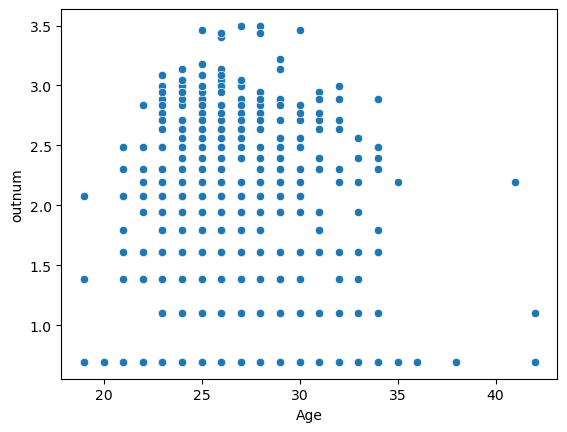

In [45]:
sns.scatterplot(data=df, x='Age', y='outnum')

<Axes: xlabel='occnum', ylabel='outnum'>

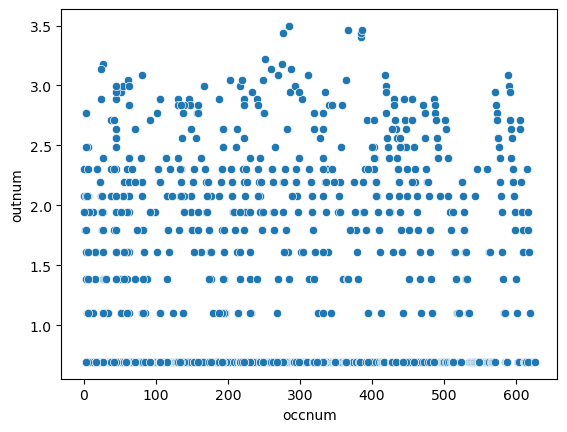

In [46]:
sns.scatterplot(data=df, x='occnum', y='outnum')

In [47]:
#sns.scatterplot(data=df, x='statnum', y='outnum')

In [48]:
import statistics
import random
from tqdm import tqdm
df=df.dropna()


am=statistics.mean(df['Age'])
ast=statistics.stdev(df['Age'])
om=statistics.mean(df['occnum'])
ost=statistics.stdev(df['occnum'])


ts=.1
trs=(1-ts)
trdf=df.sample(frac=1-ts,random_state=2442)
tst=df.drop(trdf.index)
trdf.head()
time.sleep(1)
trdf=trdf.dropna()
b=0
trdf['Age_scaled']=trdf['Age'].apply(lambda x:(x-am)/ast)
trdf['occnum_scaled']= trdf['occnum'].apply(lambda x: (x - om) / ost)
m1 = 0.0
m2 = 0.0
b = 0.0
epochtest={'Epoch':[], 'B':[], 'M1':[], 'M2':[], 'resid':[]}

for i in tqdm(range(len(trdf)), desc="training", unit="iteration"):    
    for j, player in trdf.iterrows(): 
        lr = 0.001/(10^j)

        ypred = b + (m1 * player['Age_scaled']) + (m2 * player['occnum_scaled'])
        yact = player['outnum']
        resid = yact - ypred

        b += lr * resid
        m1 += lr * resid * player['Age_scaled']  
        m2 += lr * resid * player['occnum_scaled']
    print(f'Epoch: {i} \nAccuracy: {resid}')
    epochtest['B'].append(b)
    epochtest['Epoch'].append(i)
    epochtest['M1'].append(m1)
    epochtest['M2'].append(m2)
    epochtest['resid'].append(resid)
epochtest=pd.DataFrame(epochtest)

"""
print(f'M1: {m1} \nM2:{m2} \nB: {b}')
print('\nyact:', yact)
print('ypred:', ypred)
print('resid:', resid)
print(f'\nEquation: y_pred = {b} + {m1}(age) + {m2}(occupation number)')
"""
epochtest.head()

training:   0%|          | 2/899 [00:00<02:37,  5.68iteration/s]

Epoch: 0 
Accuracy: 0.6773458559219269
Epoch: 1 
Accuracy: 0.6617469730470228


training:   0%|          | 3/899 [00:00<02:33,  5.85iteration/s]

Epoch: 2 
Accuracy: 0.6463712146929637
Epoch: 3 
Accuracy: 0.6312153399915186


training:   1%|          | 6/899 [00:00<02:21,  6.32iteration/s]

Epoch: 4 
Accuracy: 0.6162761552794582
Epoch: 5 
Accuracy: 0.6015505134105534


training:   1%|          | 8/899 [00:01<02:29,  5.96iteration/s]

Epoch: 6 
Accuracy: 0.5870353130776017
Epoch: 7 
Accuracy: 0.5727274981443378


training:   1%|          | 9/899 [00:01<02:31,  5.87iteration/s]

Epoch: 8 
Accuracy: 0.5586240569870835
Epoch: 9 
Accuracy: 0.5447220218459932


training:   1%|▏         | 12/899 [00:02<02:33,  5.76iteration/s]

Epoch: 10 
Accuracy: 0.5310184681857562
Epoch: 11 
Accuracy: 0.5175105140656187


training:   2%|▏         | 14/899 [00:02<02:34,  5.74iteration/s]

Epoch: 12 
Accuracy: 0.5041953195185899
Epoch: 13 
Accuracy: 0.4910700859396966


training:   2%|▏         | 15/899 [00:02<02:33,  5.74iteration/s]

Epoch: 14 
Accuracy: 0.478132055483154
Epoch: 15 
Accuracy: 0.4653785104683262


training:   2%|▏         | 18/899 [00:03<02:31,  5.82iteration/s]

Epoch: 16 
Accuracy: 0.45280677279434317
Epoch: 17 
Accuracy: 0.44041420336325554


training:   2%|▏         | 19/899 [00:03<02:32,  5.78iteration/s]

Epoch: 18 
Accuracy: 0.4281982015115939
Epoch: 19 
Accuracy: 0.4161562044502136


training:   2%|▏         | 22/899 [00:03<02:32,  5.74iteration/s]

Epoch: 20 
Accuracy: 0.40428568671231
Epoch: 21 
Accuracy: 0.39258415960947557


training:   3%|▎         | 24/899 [00:04<02:35,  5.62iteration/s]

Epoch: 22 
Accuracy: 0.38104917069568633
Epoch: 23 
Accuracy: 0.3696783032391029


training:   3%|▎         | 26/899 [00:04<02:34,  5.65iteration/s]

Epoch: 24 
Accuracy: 0.3584691757015738
Epoch: 25 
Accuracy: 0.34741944122571816


training:   3%|▎         | 28/899 [00:04<02:33,  5.68iteration/s]

Epoch: 26 
Accuracy: 0.336526787129496
Epoch: 27 
Accuracy: 0.3257889344081336


training:   3%|▎         | 30/899 [00:05<02:32,  5.68iteration/s]

Epoch: 28 
Accuracy: 0.31520363724332007
Epoch: 29 
Accuracy: 0.30476868251955447


training:   4%|▎         | 32/899 [00:05<02:28,  5.83iteration/s]

Epoch: 30 
Accuracy: 0.2944818893475408
Epoch: 31 
Accuracy: 0.28434110859453265


training:   4%|▍         | 34/899 [00:05<02:30,  5.77iteration/s]

Epoch: 32 
Accuracy: 0.27434422242152384
Epoch: 33 
Accuracy: 0.2644891438271847


training:   4%|▍         | 36/899 [00:06<02:23,  6.00iteration/s]

Epoch: 34 
Accuracy: 0.2547738161984482
Epoch: 35 
Accuracy: 0.24519621286764282


training:   4%|▍         | 38/899 [00:06<02:14,  6.38iteration/s]

Epoch: 36 
Accuracy: 0.23575433667608625
Epoch: 37 
Accuracy: 0.22644621954403865


training:   4%|▍         | 40/899 [00:06<02:21,  6.06iteration/s]

Epoch: 38 
Accuracy: 0.21726992204691964
Epoch: 39 
Accuracy: 0.208223532997712


training:   5%|▍         | 42/899 [00:07<02:26,  5.86iteration/s]

Epoch: 40 
Accuracy: 0.19930516903544437
Epoch: 41 
Accuracy: 0.19051297421967706


training:   5%|▍         | 43/899 [00:07<02:26,  5.86iteration/s]

Epoch: 42 
Accuracy: 0.18184511963089756
Epoch: 43 
Accuracy: 0.1732998029767404


training:   5%|▌         | 46/899 [00:07<02:30,  5.69iteration/s]

Epoch: 44 
Accuracy: 0.16487524820394772
Epoch: 45 
Accuracy: 0.15656970511598578


training:   5%|▌         | 47/899 [00:08<02:29,  5.68iteration/s]

Epoch: 46 
Accuracy: 0.14838144899623695
Epoch: 47 
Accuracy: 0.14030878023668303


training:   5%|▌         | 49/899 [00:08<02:29,  5.69iteration/s]

Epoch: 48 
Accuracy: 0.13235002397199647
Epoch: 49 
Accuracy: 0.12450352971897705


training:   6%|▌         | 51/899 [00:08<02:34,  5.49iteration/s]

Epoch: 50 
Accuracy: 0.11676767102123142
Epoch: 51 
Accuracy: 0.10914084509904043


training:   6%|▌         | 54/899 [00:09<02:17,  6.15iteration/s]

Epoch: 52 
Accuracy: 0.10162147250432796
Epoch: 53 
Accuracy: 0.0942079967806545


training:   6%|▌         | 55/899 [00:09<02:09,  6.51iteration/s]

Epoch: 54 
Accuracy: 0.0868988841281787
Epoch: 55 
Accuracy: 0.07969262307348712


training:   6%|▋         | 58/899 [00:09<02:11,  6.38iteration/s]

Epoch: 56 
Accuracy: 0.07258772414424985
Epoch: 57 
Accuracy: 0.06558271954860706


training:   7%|▋         | 60/899 [00:10<02:19,  6.00iteration/s]

Epoch: 58 
Accuracy: 0.058676162859245706
Epoch: 59 
Accuracy: 0.05186662870205749


training:   7%|▋         | 62/899 [00:10<02:10,  6.39iteration/s]

Epoch: 60 
Accuracy: 0.04515271244935981
Epoch: 61 
Accuracy: 0.038533029917568684


training:   7%|▋         | 64/899 [00:10<02:03,  6.77iteration/s]

Epoch: 62 
Accuracy: 0.032006217069289744
Epoch: 63 
Accuracy: 0.02557092971975028


training:   7%|▋         | 66/899 [00:11<02:10,  6.39iteration/s]

Epoch: 64 
Accuracy: 0.019225843247507535
Epoch: 65 
Accuracy: 0.012969652309372082


training:   7%|▋         | 67/899 [00:11<02:14,  6.18iteration/s]

Epoch: 66 
Accuracy: 0.006801070559495304
Epoch: 67 
Accuracy: 0.0007188303725441658


training:   8%|▊         | 70/899 [00:11<02:04,  6.66iteration/s]

Epoch: 68 
Accuracy: -0.005278317429093682
Epoch: 69 
Accuracy: -0.011191603844114995


training:   8%|▊         | 72/899 [00:12<02:06,  6.52iteration/s]

Epoch: 70 
Accuracy: -0.017022241957195816
Epoch: 71 
Accuracy: -0.022771427200027006


training:   8%|▊         | 74/899 [00:12<02:15,  6.08iteration/s]

Epoch: 72 
Accuracy: -0.028440337608540145
Epoch: 73 
Accuracy: -0.034030134076385665


training:   8%|▊         | 75/899 [00:12<02:21,  5.81iteration/s]

Epoch: 74 
Accuracy: -0.039541960604717596
Epoch: 75 
Accuracy: -0.044976944548336895


training:   9%|▊         | 78/899 [00:13<02:23,  5.74iteration/s]

Epoch: 76 
Accuracy: -0.050336196858247084
Epoch: 77 
Accuracy: -0.05562081232066929


training:   9%|▉         | 80/899 [00:13<02:20,  5.84iteration/s]

Epoch: 78 
Accuracy: -0.06083186979258415
Epoch: 79 
Accuracy: -0.06597043243383072


training:   9%|▉         | 82/899 [00:13<02:20,  5.81iteration/s]

Epoch: 80 
Accuracy: -0.07103754793582573
Epoch: 81 
Accuracy: -0.07603424874694953


training:   9%|▉         | 83/899 [00:13<02:25,  5.62iteration/s]

Epoch: 82 
Accuracy: -0.08096155229464641
Epoch: 83 
Accuracy: -0.08582046120428877


training:  10%|▉         | 86/899 [00:14<02:23,  5.66iteration/s]

Epoch: 84 
Accuracy: -0.09061196351484535
Epoch: 85 
Accuracy: -0.09533703289141571


training:  10%|▉         | 87/899 [00:14<02:23,  5.67iteration/s]

Epoch: 86 
Accuracy: -0.09999662883465643
Epoch: 87 
Accuracy: -0.10459169688716707
Epoch: 88 
Accuracy: -0.10912316883685225


training:  10%|█         | 91/899 [00:15<02:02,  6.57iteration/s]

Epoch: 89 
Accuracy: -0.11359196291733398
Epoch: 90 
Accuracy: -0.11799898400543263


training:  10%|█         | 93/899 [00:15<02:12,  6.07iteration/s]

Epoch: 91 
Accuracy: -0.12234512381577367
Epoch: 92 
Accuracy: -0.12663126109256362


training:  11%|█         | 95/899 [00:15<02:15,  5.94iteration/s]

Epoch: 93 
Accuracy: -0.1308582617985573
Epoch: 94 
Accuracy: -0.1350269793012826


training:  11%|█         | 96/899 [00:16<02:16,  5.89iteration/s]

Epoch: 95 
Accuracy: -0.13913825455654438
Epoch: 96 
Accuracy: -0.14319291628925723


training:  11%|█         | 98/899 [00:16<02:16,  5.85iteration/s]

Epoch: 97 
Accuracy: -0.147191781171641
Epoch: 98 
Accuracy: -0.15113565399881734


training:  11%|█         | 101/899 [00:16<02:13,  5.96iteration/s]

Epoch: 99 
Accuracy: -0.1550253278618493
Epoch: 100 
Accuracy: -0.15886158431826236


training:  11%|█▏        | 103/899 [00:17<02:16,  5.84iteration/s]

Epoch: 101 
Accuracy: -0.16264519356006724
Epoch: 102 
Accuracy: -0.1663769145793519


training:  12%|█▏        | 105/899 [00:17<02:17,  5.79iteration/s]

Epoch: 103 
Accuracy: -0.17005749533144143
Epoch: 104 
Accuracy: -0.17368767289569242


training:  12%|█▏        | 107/899 [00:18<02:14,  5.90iteration/s]

Epoch: 105 
Accuracy: -0.17726817363393998
Epoch: 106 
Accuracy: -0.18079971334663447


training:  12%|█▏        | 109/899 [00:18<02:14,  5.87iteration/s]

Epoch: 107 
Accuracy: -0.18428299742670184
Epoch: 108 
Accuracy: -0.1877187210111655


training:  12%|█▏        | 111/899 [00:18<02:18,  5.68iteration/s]

Epoch: 109 
Accuracy: -0.1911075691305576
Epoch: 110 
Accuracy: -0.19445021685614294


training:  13%|█▎        | 113/899 [00:19<02:20,  5.60iteration/s]

Epoch: 111 
Accuracy: -0.1977473294450084
Epoch: 112 
Accuracy: -0.20099956248303352


training:  13%|█▎        | 114/899 [00:19<02:19,  5.64iteration/s]

Epoch: 113 
Accuracy: -0.2042075620257804
Epoch: 114 
Accuracy: -0.207371964737323


training:  13%|█▎        | 116/899 [00:19<02:14,  5.83iteration/s]

Epoch: 115 
Accuracy: -0.2104933980270599
Epoch: 116 
Accuracy: -0.21357248018452946


training:  13%|█▎        | 119/899 [00:20<02:21,  5.52iteration/s]

Epoch: 117 
Accuracy: -0.21660982051225652
Epoch: 118 
Accuracy: -0.21960601945667524


training:  13%|█▎        | 121/899 [00:20<02:18,  5.62iteration/s]

Epoch: 119 
Accuracy: -0.22256166873713157
Epoch: 120 
Accuracy: -0.2254773514730094


training:  14%|█▎        | 123/899 [00:20<02:16,  5.68iteration/s]

Epoch: 121 
Accuracy: -0.22835364230900324
Epoch: 122 
Accuracy: -0.23119110753856853


training:  14%|█▍        | 125/899 [00:21<02:11,  5.88iteration/s]

Epoch: 123 
Accuracy: -0.2339903052255684
Epoch: 124 
Accuracy: -0.23675178532414531


training:  14%|█▍        | 127/899 [00:21<02:12,  5.81iteration/s]

Epoch: 125 
Accuracy: -0.23947608979685941
Epoch: 126 
Accuracy: -0.2421637527310837


training:  14%|█▍        | 129/899 [00:21<02:13,  5.76iteration/s]

Epoch: 127 
Accuracy: -0.2448153004537209
Epoch: 128 
Accuracy: -0.24743125164423663


training:  15%|█▍        | 131/899 [00:22<02:13,  5.77iteration/s]

Epoch: 129 
Accuracy: -0.250012117446056
Epoch: 130 
Accuracy: -0.2525584015763275


training:  15%|█▍        | 133/899 [00:22<02:12,  5.77iteration/s]

Epoch: 131 
Accuracy: -0.2550706004340889
Epoch: 132 
Accuracy: -0.2575492032068549


training:  15%|█▌        | 135/899 [00:22<02:12,  5.75iteration/s]

Epoch: 133 
Accuracy: -0.2599946919756696
Epoch: 134 
Accuracy: -0.26240754181859105


training:  15%|█▌        | 137/899 [00:23<02:14,  5.68iteration/s]

Epoch: 135 
Accuracy: -0.26478822091270315
Epoch: 136 
Accuracy: -0.26713719063462704


training:  15%|█▌        | 139/899 [00:23<02:13,  5.71iteration/s]

Epoch: 137 
Accuracy: -0.26945490565955554
Epoch: 138 
Accuracy: -0.2717418140588749


training:  16%|█▌        | 141/899 [00:23<02:09,  5.84iteration/s]

Epoch: 139 
Accuracy: -0.2739983573963273
Epoch: 140 
Accuracy: -0.2762249708227952


training:  16%|█▌        | 143/899 [00:24<02:13,  5.68iteration/s]

Epoch: 141 
Accuracy: -0.2784220831697043
Epoch: 142 
Accuracy: -0.28059011704105397


training:  16%|█▌        | 145/899 [00:24<02:11,  5.73iteration/s]

Epoch: 143 
Accuracy: -0.2827294889041133
Epoch: 144 
Accuracy: -0.28484060917878795


training:  16%|█▋        | 147/899 [00:25<02:10,  5.75iteration/s]

Epoch: 145 
Accuracy: -0.2869238823257029
Epoch: 146 
Accuracy: -0.28897970693298103


training:  17%|█▋        | 149/899 [00:25<01:57,  6.39iteration/s]

Epoch: 147 
Accuracy: -0.2910084758017647
Epoch: 148 
Accuracy: -0.29301057603049396


training:  17%|█▋        | 151/899 [00:25<01:58,  6.29iteration/s]

Epoch: 149 
Accuracy: -0.29498638909795105
Epoch: 150 
Accuracy: -0.2969362909451011


training:  17%|█▋        | 153/899 [00:25<01:55,  6.47iteration/s]

Epoch: 151 
Accuracy: -0.29886065205573253
Epoch: 152 
Accuracy: -0.30075983753593316


training:  17%|█▋        | 155/899 [00:26<01:43,  7.22iteration/s]

Epoch: 153 
Accuracy: -0.30263420719238643
Epoch: 154 
Accuracy: -0.30448411560956057


training:  17%|█▋        | 157/899 [00:26<01:41,  7.29iteration/s]

Epoch: 155 
Accuracy: -0.3063099122257338
Epoch: 156 
Accuracy: -0.30811194140794707


training:  18%|█▊        | 159/899 [00:26<01:37,  7.58iteration/s]

Epoch: 157 
Accuracy: -0.3098905425258419
Epoch: 158 
Accuracy: -0.31164605002442525


training:  18%|█▊        | 161/899 [00:26<01:41,  7.26iteration/s]

Epoch: 159 
Accuracy: -0.3133787934957818
Epoch: 160 
Accuracy: -0.31508909774973504


training:  18%|█▊        | 162/899 [00:27<01:39,  7.43iteration/s]

Epoch: 161 
Accuracy: -0.31677728288348395
Epoch: 162 
Accuracy: -0.31844366435021876


training:  18%|█▊        | 164/899 [00:27<01:44,  7.06iteration/s]

Epoch: 163 
Accuracy: -0.3200885530267358
Epoch: 164 
Accuracy: -0.32171225528007763
Epoch: 165 
Accuracy: -0.3233150730331876


training:  19%|█▊        | 168/899 [00:27<01:22,  8.81iteration/s]

Epoch: 166 
Accuracy: -0.3248973038296209
Epoch: 167 
Accuracy: -0.3264592408972994


training:  19%|█▉        | 170/899 [00:28<01:38,  7.38iteration/s]

Epoch: 168 
Accuracy: -0.32800117321135025
Epoch: 169 
Accuracy: -0.32952338555602123


training:  19%|█▉        | 172/899 [00:28<01:51,  6.54iteration/s]

Epoch: 170 
Accuracy: -0.33102615858569784
Epoch: 171 
Accuracy: -0.3325097688850237


training:  19%|█▉        | 174/899 [00:28<02:00,  6.00iteration/s]

Epoch: 172 
Accuracy: -0.33397448902815297
Epoch: 173 
Accuracy: -0.33542058763713933


training:  20%|█▉        | 176/899 [00:29<02:03,  5.86iteration/s]

Epoch: 174 
Accuracy: -0.3368483294394592
Epoch: 175 
Accuracy: -0.3382579753247278


training:  20%|█▉        | 178/899 [00:29<02:04,  5.80iteration/s]

Epoch: 176 
Accuracy: -0.33964978240055144
Epoch: 177 
Accuracy: -0.341024004047599


training:  20%|██        | 180/899 [00:29<02:09,  5.56iteration/s]

Epoch: 178 
Accuracy: -0.3423808899738384
Epoch: 179 
Accuracy: -0.34372068626801877


training:  20%|██        | 182/899 [00:30<02:08,  5.56iteration/s]

Epoch: 180 
Accuracy: -0.3450436354523355
Epoch: 181 
Accuracy: -0.34634997653436794


training:  20%|██        | 184/899 [00:30<02:06,  5.65iteration/s]

Epoch: 182 
Accuracy: -0.34763994505822426
Epoch: 183 
Accuracy: -0.3489137731549562


training:  21%|██        | 186/899 [00:30<02:05,  5.69iteration/s]

Epoch: 184 
Accuracy: -0.35017168959224965
Epoch: 185 
Accuracy: -0.35141391982336756


training:  21%|██        | 187/899 [00:31<02:04,  5.71iteration/s]

Epoch: 186 
Accuracy: -0.35264068603540244
Epoch: 187 
Accuracy: -0.35385220719681143


training:  21%|██        | 189/899 [00:31<02:00,  5.89iteration/s]

Epoch: 188 
Accuracy: -0.3550486991042635
Epoch: 189 
Accuracy: -0.3562303744288019


training:  21%|██▏       | 192/899 [00:31<01:59,  5.94iteration/s]

Epoch: 190 
Accuracy: -0.35739744276134544
Epoch: 191 
Accuracy: -0.358550110657495


training:  21%|██▏       | 193/899 [00:32<01:56,  6.05iteration/s]

Epoch: 192 
Accuracy: -0.3596885816817351
Epoch: 193 
Accuracy: -0.3608130564509512


training:  22%|██▏       | 196/899 [00:32<02:00,  5.86iteration/s]

Epoch: 194 
Accuracy: -0.3619237326773287
Epoch: 195 
Accuracy: -0.3630208052106242


training:  22%|██▏       | 198/899 [00:33<02:01,  5.79iteration/s]

Epoch: 196 
Accuracy: -0.36410446607982083
Epoch: 197 
Accuracy: -0.36517490453418733


training:  22%|██▏       | 200/899 [00:33<02:01,  5.75iteration/s]

Epoch: 198 
Accuracy: -0.36623230708372023
Epoch: 199 
Accuracy: -0.3672768575390003


training:  22%|██▏       | 201/899 [00:33<02:01,  5.75iteration/s]

Epoch: 200 
Accuracy: -0.3683087370504864
Epoch: 201 
Accuracy: -0.3693281241472218


training:  23%|██▎       | 204/899 [00:34<02:01,  5.74iteration/s]

Epoch: 202 
Accuracy: -0.3703351947749679
Epoch: 203 
Accuracy: -0.3713301223338049


training:  23%|██▎       | 206/899 [00:34<02:01,  5.73iteration/s]

Epoch: 204 
Accuracy: -0.3723130777151634
Epoch: 205 
Accuracy: -0.3732842293383357


training:  23%|██▎       | 208/899 [00:34<02:02,  5.63iteration/s]

Epoch: 206 
Accuracy: -0.37424374318643727
Epoch: 207 
Accuracy: -0.3751917828418533


training:  23%|██▎       | 210/899 [00:35<02:02,  5.63iteration/s]

Epoch: 208 
Accuracy: -0.37612850952117427
Epoch: 209 
Accuracy: -0.3770540821096061


training:  24%|██▎       | 212/899 [00:35<01:56,  5.92iteration/s]

Epoch: 210 
Accuracy: -0.37796865719489914
Epoch: 211 
Accuracy: -0.3788723891007596


training:  24%|██▍       | 214/899 [00:35<01:57,  5.85iteration/s]

Epoch: 212 
Accuracy: -0.3797654299197962
Epoch: 213 
Accuracy: -0.3806479295459796


training:  24%|██▍       | 216/899 [00:36<01:58,  5.77iteration/s]

Epoch: 214 
Accuracy: -0.38152003570661785
Epoch: 215 
Accuracy: -0.3823818939938838


training:  24%|██▍       | 218/899 [00:36<01:59,  5.69iteration/s]

Epoch: 216 
Accuracy: -0.38323364789586833
Epoch: 217 
Accuracy: -0.3840754388271893


training:  24%|██▍       | 220/899 [00:36<01:56,  5.85iteration/s]

Epoch: 218 
Accuracy: -0.3849074061591521
Epoch: 219 
Accuracy: -0.38572968724946943


training:  25%|██▍       | 222/899 [00:37<01:56,  5.83iteration/s]

Epoch: 220 
Accuracy: -0.38654241747155693
Epoch: 221 
Accuracy: -0.38734573024338526


training:  25%|██▍       | 224/899 [00:37<01:56,  5.79iteration/s]

Epoch: 222 
Accuracy: -0.38813975705592385
Epoch: 223 
Accuracy: -0.38892462750117385


training:  25%|██▌       | 226/899 [00:37<01:56,  5.80iteration/s]

Epoch: 224 
Accuracy: -0.3897004692997791
Epoch: 225 
Accuracy: -0.39046740832824434


training:  25%|██▌       | 227/899 [00:38<01:56,  5.77iteration/s]

Epoch: 226 
Accuracy: -0.39122556864575875
Epoch: 227 
Accuracy: -0.3919750725206189


training:  26%|██▌       | 230/899 [00:38<02:01,  5.53iteration/s]

Epoch: 228 
Accuracy: -0.39271604045627695
Epoch: 229 
Accuracy: -0.39344859121700526


training:  26%|██▌       | 232/899 [00:38<01:58,  5.62iteration/s]

Epoch: 230 
Accuracy: -0.39417284185318235
Epoch: 231 
Accuracy: -0.39488890772621954


training:  26%|██▌       | 234/899 [00:39<01:57,  5.65iteration/s]

Epoch: 232 
Accuracy: -0.39559690253311885
Epoch: 233 
Accuracy: -0.39629693833067325


training:  26%|██▋       | 236/899 [00:39<01:58,  5.59iteration/s]

Epoch: 234 
Accuracy: -0.39698912555931465
Epoch: 235 
Accuracy: -0.39767357306661755


training:  26%|██▋       | 237/899 [00:39<01:54,  5.78iteration/s]

Epoch: 236 
Accuracy: -0.3983503881304561
Epoch: 237 
Accuracy: -0.39901967648182846


training:  27%|██▋       | 240/899 [00:40<02:00,  5.48iteration/s]

Epoch: 238 
Accuracy: -0.3996815423273411
Epoch: 239 
Accuracy: -0.40033608837137435


training:  27%|██▋       | 242/899 [00:40<01:55,  5.71iteration/s]

Epoch: 240 
Accuracy: -0.40098341583791985
Epoch: 241 
Accuracy: -0.401623624492098


training:  27%|██▋       | 244/899 [00:41<01:57,  5.58iteration/s]

Epoch: 242 
Accuracy: -0.40225681266137736
Epoch: 243 
Accuracy: -0.40288307725644923


training:  27%|██▋       | 246/899 [00:41<01:55,  5.65iteration/s]

Epoch: 244 
Accuracy: -0.4035025137918459
Epoch: 245 
Accuracy: -0.4041152164062193


training:  28%|██▊       | 248/899 [00:41<01:43,  6.31iteration/s]

Epoch: 246 
Accuracy: -0.40472127788234513
Epoch: 247 
Accuracy: -0.4053207896668255


training:  28%|██▊       | 250/899 [00:42<01:43,  6.25iteration/s]

Epoch: 248 
Accuracy: -0.40591384188951374
Epoch: 249 
Accuracy: -0.40650052338265164


training:  28%|██▊       | 252/899 [00:42<01:45,  6.15iteration/s]

Epoch: 250 
Accuracy: -0.4070809216997172
Epoch: 251 
Accuracy: -0.40765512313402297


training:  28%|██▊       | 253/899 [00:42<01:47,  5.99iteration/s]

Epoch: 252 
Accuracy: -0.40822321273701434
Epoch: 253 
Accuracy: -0.4087852743363266


training:  28%|██▊       | 256/899 [00:43<01:41,  6.35iteration/s]

Epoch: 254 
Accuracy: -0.40934139055356444
Epoch: 255 
Accuracy: -0.40989164282182167


training:  29%|██▊       | 258/899 [00:43<01:47,  5.98iteration/s]

Epoch: 256 
Accuracy: -0.41043611140296143
Epoch: 257 
Accuracy: -0.4109748754046204


training:  29%|██▉       | 260/899 [00:43<01:47,  5.97iteration/s]

Epoch: 258 
Accuracy: -0.41150801279698224
Epoch: 259 
Accuracy: -0.4120356004293103


training:  29%|██▉       | 262/899 [00:44<01:43,  6.15iteration/s]

Epoch: 260 
Accuracy: -0.4125577140462232
Epoch: 261 
Accuracy: -0.4130744283037474


training:  29%|██▉       | 263/899 [00:44<01:45,  6.01iteration/s]

Epoch: 262 
Accuracy: -0.4135858167851273
Epoch: 263 
Accuracy: -0.4140919520164109


training:  30%|██▉       | 266/899 [00:44<01:48,  5.81iteration/s]

Epoch: 264 
Accuracy: -0.4145929054818046
Epoch: 265 
Accuracy: -0.41508874763880776


training:  30%|██▉       | 268/899 [00:45<01:49,  5.79iteration/s]

Epoch: 266 
Accuracy: -0.41557954793312335
Epoch: 267 
Accuracy: -0.41606537481335526


training:  30%|███       | 270/899 [00:45<01:49,  5.77iteration/s]

Epoch: 268 
Accuracy: -0.41654629574548674
Epoch: 269 
Accuracy: -0.4170223772271552


training:  30%|███       | 272/899 [00:45<01:48,  5.77iteration/s]

Epoch: 270 
Accuracy: -0.41749368480170734
Epoch: 271 
Accuracy: -0.4179602830720649


training:  30%|███       | 273/899 [00:45<01:45,  5.92iteration/s]

Epoch: 272 
Accuracy: -0.41842223571437087
Epoch: 273 
Accuracy: -0.4188796054914602


training:  31%|███       | 276/899 [00:46<01:48,  5.72iteration/s]

Epoch: 274 
Accuracy: -0.41933245426610377
Epoch: 275 
Accuracy: -0.4197808430140896


training:  31%|███       | 278/899 [00:46<01:48,  5.74iteration/s]

Epoch: 276 
Accuracy: -0.4202248318371008
Epoch: 277 
Accuracy: -0.42066447997539325


training:  31%|███       | 279/899 [00:47<01:45,  5.90iteration/s]

Epoch: 278 
Accuracy: -0.4210998458203087
Epoch: 279 
Accuracy: -0.42153098692660096


training:  31%|███▏      | 281/899 [00:47<01:48,  5.71iteration/s]

Epoch: 280 
Accuracy: -0.42195796002457453
Epoch: 281 
Accuracy: -0.4223808210320571


training:  32%|███▏      | 284/899 [00:47<01:45,  5.81iteration/s]

Epoch: 282 
Accuracy: -0.4227996250661822
Epoch: 283 
Accuracy: -0.4232144264550225


training:  32%|███▏      | 286/899 [00:48<01:46,  5.75iteration/s]

Epoch: 284 
Accuracy: -0.42362527874903055
Epoch: 285 
Accuracy: -0.4240322347323292


training:  32%|███▏      | 288/899 [00:48<01:37,  6.24iteration/s]

Epoch: 286 
Accuracy: -0.4244353464338314
Epoch: 287 
Accuracy: -0.4248346651382028


training:  32%|███▏      | 290/899 [00:48<01:44,  5.85iteration/s]

Epoch: 288 
Accuracy: -0.4252302413966541
Epoch: 289 
Accuracy: -0.4256221250375841


training:  32%|███▏      | 291/899 [00:49<01:44,  5.80iteration/s]

Epoch: 290 
Accuracy: -0.42601036517707513
Epoch: 291 
Accuracy: -0.4263950102292159


training:  33%|███▎      | 294/899 [00:49<01:45,  5.75iteration/s]

Epoch: 292 
Accuracy: -0.42677610791628984
Epoch: 293 
Accuracy: -0.427153705278812


training:  33%|███▎      | 296/899 [00:49<01:45,  5.70iteration/s]

Epoch: 294 
Accuracy: -0.42752784868541915
Epoch: 295 
Accuracy: -0.4278985838426116


training:  33%|███▎      | 298/899 [00:50<01:43,  5.81iteration/s]

Epoch: 296 
Accuracy: -0.4282659558043599
Epoch: 297 
Accuracy: -0.42863000898156856


training:  33%|███▎      | 300/899 [00:50<01:46,  5.64iteration/s]

Epoch: 298 
Accuracy: -0.42899078715140215
Epoch: 299 
Accuracy: -0.42934833346646817


training:  33%|███▎      | 301/899 [00:50<01:45,  5.65iteration/s]

Epoch: 300 
Accuracy: -0.4297026904638871
Epoch: 301 
Accuracy: -0.43005390007420796


training:  34%|███▎      | 303/899 [00:51<01:47,  5.56iteration/s]

Epoch: 302 
Accuracy: -0.43040200363020265
Epoch: 303 
Accuracy: -0.43074704187553625


training:  34%|███▍      | 306/899 [00:51<01:42,  5.76iteration/s]

Epoch: 304 
Accuracy: -0.4310890549733096
Epoch: 305 
Accuracy: -0.4314280825144642


training:  34%|███▍      | 308/899 [00:52<01:43,  5.73iteration/s]

Epoch: 306 
Accuracy: -0.4317641635260888
Epoch: 307 
Accuracy: -0.43209733647958737


training:  34%|███▍      | 310/899 [00:52<01:43,  5.70iteration/s]

Epoch: 308 
Accuracy: -0.4324276392987353
Epoch: 309 
Accuracy: -0.43275510936760486


training:  35%|███▍      | 312/899 [00:52<01:43,  5.69iteration/s]

Epoch: 310 
Accuracy: -0.4330797835384069
Epoch: 311 
Accuracy: -0.4334016981391816


training:  35%|███▍      | 314/899 [00:53<01:38,  5.92iteration/s]

Epoch: 312 
Accuracy: -0.43372088898139516
Epoch: 313 
Accuracy: -0.43403739136743036


training:  35%|███▌      | 316/899 [00:53<01:40,  5.80iteration/s]

Epoch: 314 
Accuracy: -0.4343512400979629
Epoch: 315 
Accuracy: -0.4346624694792257


training:  35%|███▌      | 318/899 [00:53<01:41,  5.75iteration/s]

Epoch: 316 
Accuracy: -0.4349711133301707
Epoch: 317 
Accuracy: -0.43527720498953515


training:  36%|███▌      | 320/899 [00:54<01:38,  5.87iteration/s]

Epoch: 318 
Accuracy: -0.4355807773227859
Epoch: 319 
Accuracy: -0.43588186272898033


training:  36%|███▌      | 322/899 [00:54<01:39,  5.78iteration/s]

Epoch: 320 
Accuracy: -0.4361804931475223
Epoch: 321 
Accuracy: -0.436476700064811


training:  36%|███▌      | 324/899 [00:54<01:40,  5.73iteration/s]

Epoch: 322 
Accuracy: -0.43677051452081017
Epoch: 323 
Accuracy: -0.43706196711551104


training:  36%|███▋      | 326/899 [00:55<01:40,  5.72iteration/s]

Epoch: 324 
Accuracy: -0.4373510880152901
Epoch: 325 
Accuracy: -0.4376379069591997


training:  36%|███▋      | 328/899 [00:55<01:37,  5.87iteration/s]

Epoch: 326 
Accuracy: -0.43792245326515145
Epoch: 327 
Accuracy: -0.43820475583600726


training:  37%|███▋      | 330/899 [00:55<01:39,  5.73iteration/s]

Epoch: 328 
Accuracy: -0.4384848431655902
Epoch: 329 
Accuracy: -0.4387627433446014


training:  37%|███▋      | 332/899 [00:56<01:38,  5.76iteration/s]

Epoch: 330 
Accuracy: -0.43903848406646306
Epoch: 331 
Accuracy: -0.43931209263305326


training:  37%|███▋      | 334/899 [00:56<01:39,  5.68iteration/s]

Epoch: 332 
Accuracy: -0.439583595960381
Epoch: 333 
Accuracy: -0.4398530205841643


training:  37%|███▋      | 335/899 [00:56<01:39,  5.68iteration/s]

Epoch: 334 
Accuracy: -0.4401203926653371
Epoch: 335 
Accuracy: -0.44038573799546266


training:  38%|███▊      | 338/899 [00:57<01:34,  5.92iteration/s]

Epoch: 336 
Accuracy: -0.4406490820020844
Epoch: 337 
Accuracy: -0.44091044975398097


training:  38%|███▊      | 339/899 [00:57<01:35,  5.86iteration/s]

Epoch: 338 
Accuracy: -0.4411698659663662
Epoch: 339 
Accuracy: -0.4414273550059927


training:  38%|███▊      | 341/899 [00:57<01:36,  5.81iteration/s]

Epoch: 340 
Accuracy: -0.441682940896199
Epoch: 341 
Accuracy: -0.441936647321863


training:  38%|███▊      | 344/899 [00:58<01:35,  5.81iteration/s]

Epoch: 342 
Accuracy: -0.4421884976343061
Epoch: 343 
Accuracy: -0.44243851485610797


training:  38%|███▊      | 346/899 [00:58<01:34,  5.88iteration/s]

Epoch: 344 
Accuracy: -0.4426867216858609
Epoch: 345 
Accuracy: -0.4429331405028557


training:  39%|███▊      | 348/899 [00:58<01:29,  6.19iteration/s]

Epoch: 346 
Accuracy: -0.44317779337168284
Epoch: 347 
Accuracy: -0.4434207020468005


training:  39%|███▉      | 350/899 [00:59<01:31,  6.00iteration/s]

Epoch: 348 
Accuracy: -0.4436618879769988
Epoch: 349 
Accuracy: -0.4439013723098201


training:  39%|███▉      | 352/899 [00:59<01:33,  5.84iteration/s]

Epoch: 350 
Accuracy: -0.4441391758959147
Epoch: 351 
Accuracy: -0.4443753192933245


training:  39%|███▉      | 354/899 [00:59<01:30,  5.99iteration/s]

Epoch: 352 
Accuracy: -0.4446098227717147
Epoch: 353 
Accuracy: -0.44484270631652956


training:  39%|███▉      | 355/899 [01:00<01:29,  6.10iteration/s]

Epoch: 354 
Accuracy: -0.44507398963310496


training:  40%|███▉      | 356/899 [01:00<01:38,  5.51iteration/s]

Epoch: 355 
Accuracy: -0.4453036921507144


training:  40%|███▉      | 357/899 [01:00<01:47,  5.03iteration/s]

Epoch: 356 
Accuracy: -0.4455318330265393
Epoch: 357 
Accuracy: -0.4457584311496158


training:  40%|███▉      | 359/899 [01:00<01:41,  5.32iteration/s]

Epoch: 358 
Accuracy: -0.4459835051446973
Epoch: 359 
Accuracy: -0.4462070733760607


training:  40%|████      | 362/899 [01:01<01:36,  5.54iteration/s]

Epoch: 360 
Accuracy: -0.4464291539512816
Epoch: 361 
Accuracy: -0.44664976472491935


training:  40%|████      | 363/899 [01:01<01:35,  5.59iteration/s]

Epoch: 362 
Accuracy: -0.4468689233021862
Epoch: 363 
Accuracy: -0.4470866470425322


training:  41%|████      | 366/899 [01:02<01:34,  5.66iteration/s]

Epoch: 364 
Accuracy: -0.44730295306319434
Epoch: 365 
Accuracy: -0.4475178582426903


training:  41%|████      | 368/899 [01:02<01:33,  5.69iteration/s]

Epoch: 366 
Accuracy: -0.4477313792242591
Epoch: 367 
Accuracy: -0.4479435324192539


training:  41%|████      | 370/899 [01:02<01:34,  5.59iteration/s]

Epoch: 368 
Accuracy: -0.44815433401048577
Epoch: 369 
Accuracy: -0.44836379995552067


training:  41%|████▏     | 372/899 [01:03<01:28,  5.98iteration/s]

Epoch: 370 
Accuracy: -0.44857194598992456
Epoch: 371 
Accuracy: -0.4487787876304582


training:  41%|████▏     | 373/899 [01:03<01:29,  5.88iteration/s]

Epoch: 372 
Accuracy: -0.44898434017823885
Epoch: 373 
Accuracy: -0.44918861872184


training:  42%|████▏     | 376/899 [01:03<01:30,  5.76iteration/s]

Epoch: 374 
Accuracy: -0.4493916381403601
Epoch: 375 
Accuracy: -0.4495934131064324


training:  42%|████▏     | 378/899 [01:04<01:14,  7.04iteration/s]

Epoch: 376 
Accuracy: -0.4497939580892104
Epoch: 377 
Accuracy: -0.44999328735728195


training:  42%|████▏     | 380/899 [01:04<01:21,  6.38iteration/s]

Epoch: 378 
Accuracy: -0.45019141498157256
Epoch: 379 
Accuracy: -0.4503883548381823


training:  42%|████▏     | 382/899 [01:04<01:25,  6.05iteration/s]

Epoch: 380 
Accuracy: -0.4505841206111928
Epoch: 381 
Accuracy: -0.4507787257954342


training:  43%|████▎     | 384/899 [01:05<01:29,  5.77iteration/s]

Epoch: 382 
Accuracy: -0.4509721836992001
Epoch: 383 
Accuracy: -0.45116450744694647


training:  43%|████▎     | 386/899 [01:05<01:30,  5.64iteration/s]

Epoch: 384 
Accuracy: -0.45135570998192
Epoch: 385 
Accuracy: -0.45154580406877887


training:  43%|████▎     | 387/899 [01:05<01:28,  5.81iteration/s]

Epoch: 386 
Accuracy: -0.4517348022961504
Epoch: 387 
Accuracy: -0.45192271707917164


training:  43%|████▎     | 390/899 [01:06<01:29,  5.67iteration/s]

Epoch: 388 
Accuracy: -0.4521095606619784
Epoch: 389 
Accuracy: -0.4522953451201658


training:  43%|████▎     | 391/899 [01:06<01:29,  5.67iteration/s]

Epoch: 390 
Accuracy: -0.45248008236320925
Epoch: 391 
Accuracy: -0.45266378413685715


training:  44%|████▍     | 394/899 [01:06<01:31,  5.51iteration/s]

Epoch: 392 
Accuracy: -0.45284646202547785
Epoch: 393 
Accuracy: -0.4530281274543816


training:  44%|████▍     | 395/899 [01:07<01:25,  5.88iteration/s]

Epoch: 394 
Accuracy: -0.45320879169210626
Epoch: 395 
Accuracy: -0.4533884658526647


training:  44%|████▍     | 398/899 [01:07<01:24,  5.93iteration/s]

Epoch: 396 
Accuracy: -0.45356716089776905
Epoch: 397 
Accuracy: -0.4537448876390172


training:  44%|████▍     | 400/899 [01:07<01:25,  5.81iteration/s]

Epoch: 398 
Accuracy: -0.4539216567400436
Epoch: 399 
Accuracy: -0.4540974787186488


training:  45%|████▍     | 402/899 [01:08<01:26,  5.76iteration/s]

Epoch: 400 
Accuracy: -0.4542723639488916
Epoch: 401 
Accuracy: -0.4544463226631418


training:  45%|████▍     | 404/899 [01:08<01:26,  5.73iteration/s]

Epoch: 402 
Accuracy: -0.4546193649541318
Epoch: 403 
Accuracy: -0.45479150077694286


training:  45%|████▌     | 405/899 [01:08<01:28,  5.58iteration/s]

Epoch: 404 
Accuracy: -0.4549627399509878
Epoch: 405 
Accuracy: -0.4551330921619564


training:  45%|████▌     | 408/899 [01:09<01:15,  6.51iteration/s]

Epoch: 406 
Accuracy: -0.45530256696372706
Epoch: 407 
Accuracy: -0.45547117378026025


training:  46%|████▌     | 410/899 [01:09<01:15,  6.46iteration/s]

Epoch: 408 
Accuracy: -0.4556389219074618
Epoch: 409 
Accuracy: -0.4558058205150176


training:  46%|████▌     | 412/899 [01:09<01:20,  6.05iteration/s]

Epoch: 410 
Accuracy: -0.4559718786481973
Epoch: 411 
Accuracy: -0.4561371052296409


training:  46%|████▌     | 414/899 [01:10<01:24,  5.76iteration/s]

Epoch: 412 
Accuracy: -0.4563015090611172
Epoch: 413 
Accuracy: -0.4564650988252489


training:  46%|████▌     | 415/899 [01:10<01:24,  5.74iteration/s]

Epoch: 414 
Accuracy: -0.4566278830872187
Epoch: 415 
Accuracy: -0.4567898702964571


training:  46%|████▋     | 418/899 [01:11<01:25,  5.64iteration/s]

Epoch: 416 
Accuracy: -0.45695106878828573
Epoch: 417 
Accuracy: -0.4571114867855687


training:  47%|████▋     | 420/899 [01:11<01:23,  5.72iteration/s]

Epoch: 418 
Accuracy: -0.4572711324003028
Epoch: 419 
Accuracy: -0.4574300136352153


training:  47%|████▋     | 422/899 [01:11<01:11,  6.65iteration/s]

Epoch: 420 
Accuracy: -0.457588138385321
Epoch: 421 
Accuracy: -0.4577455144394592


training:  47%|████▋     | 423/899 [01:11<01:13,  6.50iteration/s]

Epoch: 422 
Accuracy: -0.45790214948182506
Epoch: 423 
Accuracy: -0.45805805109344677


training:  47%|████▋     | 426/899 [01:12<01:03,  7.49iteration/s]

Epoch: 424 
Accuracy: -0.45821322675367016
Epoch: 425 
Accuracy: -0.45836768384160786


training:  48%|████▊     | 428/899 [01:12<01:12,  6.53iteration/s]

Epoch: 426 
Accuracy: -0.45852142963757736
Epoch: 427 
Accuracy: -0.458674471324498


training:  48%|████▊     | 430/899 [01:12<01:15,  6.17iteration/s]

Epoch: 428 
Accuracy: -0.4588268159892933
Epoch: 429 
Accuracy: -0.458978470624254


training:  48%|████▊     | 432/899 [01:13<01:20,  5.82iteration/s]

Epoch: 430 
Accuracy: -0.4591294421283957
Epoch: 431 
Accuracy: -0.4592797373087799


training:  48%|████▊     | 434/899 [01:13<01:19,  5.82iteration/s]

Epoch: 432 
Accuracy: -0.4594293628818332
Epoch: 433 
Accuracy: -0.4595783254746334


training:  48%|████▊     | 435/899 [01:13<01:15,  6.11iteration/s]

Epoch: 434 
Accuracy: -0.45972663162618843
Epoch: 435 
Accuracy: -0.45987428778868666


training:  49%|████▊     | 438/899 [01:14<01:19,  5.80iteration/s]

Epoch: 436 
Accuracy: -0.4600213003287398
Epoch: 437 
Accuracy: -0.46016767552859605


training:  49%|████▉     | 439/899 [01:14<01:18,  5.83iteration/s]

Epoch: 438 
Accuracy: -0.4603134195873416
Epoch: 439 
Accuracy: -0.46045853862209085


training:  49%|████▉     | 442/899 [01:14<01:18,  5.79iteration/s]

Epoch: 440 
Accuracy: -0.4606030386691454
Epoch: 441 
Accuracy: -0.4607469256851483


training:  49%|████▉     | 444/899 [01:15<01:16,  5.98iteration/s]

Epoch: 442 
Accuracy: -0.46089020554822013
Epoch: 443 
Accuracy: -0.4610328840590646


training:  49%|████▉     | 445/899 [01:15<01:14,  6.07iteration/s]

Epoch: 444 
Accuracy: -0.46117496694208515
Epoch: 445 
Accuracy: -0.46131645984645486


training:  50%|████▉     | 448/899 [01:15<01:15,  6.01iteration/s]

Epoch: 446 
Accuracy: -0.4614573683471904
Epoch: 447 
Accuracy: -0.4615976979462125


training:  50%|█████     | 450/899 [01:16<01:16,  5.86iteration/s]

Epoch: 448 
Accuracy: -0.46173745407337485
Epoch: 449 
Accuracy: -0.4618766420874919


training:  50%|█████     | 452/899 [01:16<01:18,  5.67iteration/s]

Epoch: 450 
Accuracy: -0.46201526727734643
Epoch: 451 
Accuracy: -0.46215333486268173


training:  50%|█████     | 453/899 [01:16<01:18,  5.69iteration/s]

Epoch: 452 
Accuracy: -0.4622908499951849
Epoch: 453 
Accuracy: -0.46242781775944397


training:  51%|█████     | 456/899 [01:17<01:16,  5.82iteration/s]

Epoch: 454 
Accuracy: -0.46256424317391087
Epoch: 455 
Accuracy: -0.4627001311918334


training:  51%|█████     | 458/899 [01:17<01:16,  5.74iteration/s]

Epoch: 456 
Accuracy: -0.4628354867021719
Epoch: 457 
Accuracy: -0.46297031453052007


training:  51%|█████     | 460/899 [01:18<01:16,  5.72iteration/s]

Epoch: 458 
Accuracy: -0.46310461944000136
Epoch: 459 
Accuracy: -0.4632384061321496


training:  51%|█████▏    | 462/899 [01:18<01:16,  5.71iteration/s]

Epoch: 460 
Accuracy: -0.4633716792477752
Epoch: 461 
Accuracy: -0.4635044433678418


training:  52%|█████▏    | 464/899 [01:18<01:16,  5.71iteration/s]

Epoch: 462 
Accuracy: -0.46363670301429083
Epoch: 463 
Accuracy: -0.46376846265089455


training:  52%|█████▏    | 466/899 [01:18<01:04,  6.69iteration/s]

Epoch: 464 
Accuracy: -0.46389972668406954
Epoch: 465 
Accuracy: -0.4640304994636827


training:  52%|█████▏    | 468/899 [01:19<01:05,  6.56iteration/s]

Epoch: 466 
Accuracy: -0.4641607852838604
Epoch: 467 
Accuracy: -0.4642905883837688


training:  52%|█████▏    | 470/899 [01:19<01:11,  6.01iteration/s]

Epoch: 468 
Accuracy: -0.4644199129483907
Epoch: 469 
Accuracy: -0.4645487631092905


training:  52%|█████▏    | 471/899 [01:19<01:12,  5.91iteration/s]

Epoch: 470 
Accuracy: -0.4646771429453703
Epoch: 471 
Accuracy: -0.46480505648360493


training:  53%|█████▎    | 474/899 [01:20<01:11,  5.93iteration/s]

Epoch: 472 
Accuracy: -0.46493250769978267
Epoch: 473 
Accuracy: -0.4650595005192216


training:  53%|█████▎    | 475/899 [01:20<01:14,  5.71iteration/s]

Epoch: 474 
Accuracy: -0.4651860388174843


training:  53%|█████▎    | 476/899 [01:20<01:22,  5.15iteration/s]

Epoch: 475 
Accuracy: -0.4653121264210708
Epoch: 476 
Accuracy: -0.4654377671081148
Epoch: 477 
Accuracy: -0.4655629646090632


training:  53%|█████▎    | 479/899 [01:21<01:06,  6.31iteration/s]

Epoch: 478 
Accuracy: -0.46568772260735136
Epoch: 479 
Accuracy: -0.465812044740053


training:  54%|█████▎    | 481/899 [01:21<01:08,  6.14iteration/s]

Epoch: 480 
Accuracy: -0.4659359345985422
Epoch: 481 
Accuracy: -0.46605939572913113


training:  54%|█████▍    | 484/899 [01:22<01:12,  5.73iteration/s]

Epoch: 482 
Accuracy: -0.46618243163369877
Epoch: 483 
Accuracy: -0.46630504577032583


training:  54%|█████▍    | 486/899 [01:22<01:03,  6.54iteration/s]

Epoch: 484 
Accuracy: -0.46642724155389625
Epoch: 485 
Accuracy: -0.4665490223567109


training:  54%|█████▍    | 488/899 [01:22<01:06,  6.17iteration/s]

Epoch: 486 
Accuracy: -0.46667039150908207
Epoch: 487 
Accuracy: -0.46679135229992397


training:  55%|█████▍    | 490/899 [01:23<01:08,  5.94iteration/s]

Epoch: 488 
Accuracy: -0.4669119079773284
Epoch: 489 
Accuracy: -0.4670320617491467


training:  55%|█████▍    | 492/899 [01:23<01:09,  5.86iteration/s]

Epoch: 490 
Accuracy: -0.467151816783535
Epoch: 491 
Accuracy: -0.46727117620952574


training:  55%|█████▍    | 494/899 [01:23<01:09,  5.80iteration/s]

Epoch: 492 
Accuracy: -0.4673901431175663
Epoch: 493 
Accuracy: -0.46750872056006354


training:  55%|█████▌    | 496/899 [01:24<01:10,  5.74iteration/s]

Epoch: 494 
Accuracy: -0.4676269115519104
Epoch: 495 
Accuracy: -0.46774471907101367


training:  55%|█████▌    | 498/899 [01:24<01:10,  5.72iteration/s]

Epoch: 496 
Accuracy: -0.4678621460588045
Epoch: 497 
Accuracy: -0.46797919542075916


training:  56%|█████▌    | 500/899 [01:24<01:09,  5.77iteration/s]

Epoch: 498 
Accuracy: -0.4680958700268839
Epoch: 499 
Accuracy: -0.46821217271222404


training:  56%|█████▌    | 501/899 [01:24<01:09,  5.75iteration/s]

Epoch: 500 
Accuracy: -0.4683281062773389
Epoch: 501 
Accuracy: -0.46844367348879457


training:  56%|█████▌    | 504/899 [01:25<01:08,  5.77iteration/s]

Epoch: 502 
Accuracy: -0.4685588770796306
Epoch: 503 
Accuracy: -0.4686737197498213


training:  56%|█████▌    | 505/899 [01:25<01:08,  5.76iteration/s]

Epoch: 504 
Accuracy: -0.46878820416674516
Epoch: 505 
Accuracy: -0.46890233296562844


training:  57%|█████▋    | 508/899 [01:26<01:07,  5.81iteration/s]

Epoch: 506 
Accuracy: -0.46901610875000277
Epoch: 507 
Accuracy: -0.4691295340921343


training:  57%|█████▋    | 510/899 [01:26<01:05,  5.95iteration/s]

Epoch: 508 
Accuracy: -0.4692426115334686
Epoch: 509 
Accuracy: -0.4693553435850454


training:  57%|█████▋    | 512/899 [01:26<01:06,  5.83iteration/s]

Epoch: 510 
Accuracy: -0.46946773272792985
Epoch: 511 
Accuracy: -0.4695797814136239


training:  57%|█████▋    | 515/899 [01:27<00:47,  8.09iteration/s]

Epoch: 512 
Accuracy: -0.4696914920644776
Epoch: 513 
Accuracy: -0.46980286707408514
Epoch: 514 
Accuracy: -0.46991390880769945


training:  58%|█████▊    | 517/899 [01:27<00:54,  6.96iteration/s]

Epoch: 515 
Accuracy: -0.4700246196026069
Epoch: 516 
Accuracy: -0.4701350017685212


training:  58%|█████▊    | 519/899 [01:27<01:00,  6.25iteration/s]

Epoch: 517 
Accuracy: -0.47024505758796187
Epoch: 518 
Accuracy: -0.47035478931663255


training:  58%|█████▊    | 521/899 [01:28<01:02,  6.05iteration/s]

Epoch: 519 
Accuracy: -0.4704641991837911
Epoch: 520 
Accuracy: -0.47057328939260856


training:  58%|█████▊    | 523/899 [01:28<01:03,  5.88iteration/s]

Epoch: 521 
Accuracy: -0.4706820621205333
Epoch: 522 
Accuracy: -0.47079051951964457


training:  58%|█████▊    | 525/899 [01:28<01:04,  5.77iteration/s]

Epoch: 523 
Accuracy: -0.4708986637170022
Epoch: 524 
Accuracy: -0.4710064968149855


training:  59%|█████▊    | 526/899 [01:29<01:04,  5.75iteration/s]

Epoch: 525 
Accuracy: -0.471114020891645
Epoch: 526 
Accuracy: -0.47122123800101956


training:  59%|█████▉    | 529/899 [01:29<01:02,  5.91iteration/s]

Epoch: 527 
Accuracy: -0.47132815017347707
Epoch: 528 
Accuracy: -0.4714347594160385


training:  59%|█████▉    | 530/899 [01:29<01:02,  5.91iteration/s]

Epoch: 529 
Accuracy: -0.4715410677126989
Epoch: 530 
Accuracy: -0.4716470770247331


training:  59%|█████▉    | 533/899 [01:30<01:01,  5.94iteration/s]

Epoch: 531 
Accuracy: -0.47175278929101927
Epoch: 532 
Accuracy: -0.471858206428338


training:  60%|█████▉    | 535/899 [01:30<01:03,  5.76iteration/s]

Epoch: 533 
Accuracy: -0.4719633303316769
Epoch: 534 
Accuracy: -0.47206816287452635


training:  60%|█████▉    | 537/899 [01:30<00:57,  6.33iteration/s]

Epoch: 535 
Accuracy: -0.4721727059091775
Epoch: 536 
Accuracy: -0.4722769612670096


training:  60%|█████▉    | 539/899 [01:31<01:00,  6.00iteration/s]

Epoch: 537 
Accuracy: -0.47238093075877063
Epoch: 538 
Accuracy: -0.47248461617486404


training:  60%|██████    | 541/899 [01:31<00:56,  6.29iteration/s]

Epoch: 539 
Accuracy: -0.47258801928562255
Epoch: 540 
Accuracy: -0.4726911418415848


training:  60%|██████    | 543/899 [01:31<00:59,  5.97iteration/s]

Epoch: 541 
Accuracy: -0.47279398557376007
Epoch: 542 
Accuracy: -0.47289655219389737


training:  61%|██████    | 545/899 [01:32<01:00,  5.83iteration/s]

Epoch: 543 
Accuracy: -0.4729988433947453
Epoch: 544 
Accuracy: -0.47310086085031167


training:  61%|██████    | 547/899 [01:32<01:01,  5.75iteration/s]

Epoch: 545 
Accuracy: -0.4732026062161142
Epoch: 546 
Accuracy: -0.4733040811294317


training:  61%|██████    | 549/899 [01:32<00:59,  5.86iteration/s]

Epoch: 547 
Accuracy: -0.47340528720955166
Epoch: 548 
Accuracy: -0.47350622605801884


training:  61%|██████▏   | 551/899 [01:33<01:01,  5.68iteration/s]

Epoch: 549 
Accuracy: -0.4736068992588659
Epoch: 550 
Accuracy: -0.47370730837885444


training:  62%|██████▏   | 553/899 [01:33<01:00,  5.75iteration/s]

Epoch: 551 
Accuracy: -0.4738074549677119
Epoch: 552 
Accuracy: -0.4739073405583537


training:  62%|██████▏   | 554/899 [01:33<01:00,  5.74iteration/s]

Epoch: 553 
Accuracy: -0.47400696666711417
Epoch: 554 
Accuracy: -0.47410633479397013


training:  62%|██████▏   | 557/899 [01:34<00:58,  5.82iteration/s]

Epoch: 555 
Accuracy: -0.4742054464227575
Epoch: 556 
Accuracy: -0.47430430302139615


training:  62%|██████▏   | 559/899 [01:34<00:59,  5.75iteration/s]

Epoch: 557 
Accuracy: -0.4744029060420899
Epoch: 558 
Accuracy: -0.47450125692155354


training:  62%|██████▏   | 561/899 [01:35<01:00,  5.62iteration/s]

Epoch: 559 
Accuracy: -0.4745993570812076
Epoch: 560 
Accuracy: -0.47469720792738934


training:  63%|██████▎   | 563/899 [01:35<00:59,  5.64iteration/s]

Epoch: 561 
Accuracy: -0.4747948108515573
Epoch: 562 
Accuracy: -0.47489216723048033


training:  63%|██████▎   | 565/899 [01:35<00:59,  5.63iteration/s]

Epoch: 563 
Accuracy: -0.4749892784264417
Epoch: 564 
Accuracy: -0.47508614578743347


training:  63%|██████▎   | 567/899 [01:36<00:58,  5.71iteration/s]

Epoch: 565 
Accuracy: -0.47518277064734005
Epoch: 566 
Accuracy: -0.4752791543261353


training:  63%|██████▎   | 569/899 [01:36<00:57,  5.71iteration/s]

Epoch: 567 
Accuracy: -0.4753752981300602
Epoch: 568 
Accuracy: -0.4754712033518095


training:  64%|██████▎   | 571/899 [01:36<00:53,  6.19iteration/s]

Epoch: 569 
Accuracy: -0.47556687127070496
Epoch: 570 
Accuracy: -0.47566230315288827


training:  64%|██████▎   | 573/899 [01:37<00:54,  6.03iteration/s]

Epoch: 571 
Accuracy: -0.47575750025147745
Epoch: 572 
Accuracy: -0.4758524638067513


training:  64%|██████▍   | 575/899 [01:37<00:54,  5.97iteration/s]

Epoch: 573 
Accuracy: -0.4759471950463158
Epoch: 574 
Accuracy: -0.4760416951852672


training:  64%|██████▍   | 577/899 [01:37<00:49,  6.48iteration/s]

Epoch: 575 
Accuracy: -0.4761359654263705
Epoch: 576 
Accuracy: -0.47623000696020623


training:  64%|██████▍   | 578/899 [01:37<00:51,  6.23iteration/s]

Epoch: 577 
Accuracy: -0.47632382096534076
Epoch: 578 
Accuracy: -0.47641740860848236


training:  65%|██████▍   | 581/899 [01:38<00:44,  7.11iteration/s]

Epoch: 579 
Accuracy: -0.47651077104463646
Epoch: 580 
Accuracy: -0.4766039094172597


training:  65%|██████▍   | 582/899 [01:38<00:47,  6.68iteration/s]

Epoch: 581 
Accuracy: -0.4766968248584137
Epoch: 582 
Accuracy: -0.4767895184889087


training:  65%|██████▍   | 584/899 [01:38<00:45,  6.92iteration/s]

Epoch: 583 
Accuracy: -0.47688199141845666
Epoch: 584 
Accuracy: -0.4769742447458146


training:  65%|██████▌   | 586/899 [01:39<00:50,  6.19iteration/s]

Epoch: 585 
Accuracy: -0.47706627955893166
Epoch: 586 
Accuracy: -0.47715809693508227


training:  66%|██████▌   | 589/899 [01:39<00:51,  5.98iteration/s]

Epoch: 587 
Accuracy: -0.47724969794100913
Epoch: 588 
Accuracy: -0.47734108363306327


training:  66%|██████▌   | 591/899 [01:39<00:52,  5.91iteration/s]

Epoch: 589 
Accuracy: -0.4774322550573348
Epoch: 590 
Accuracy: -0.47752321324979097


training:  66%|██████▌   | 593/899 [01:40<00:53,  5.75iteration/s]

Epoch: 591 
Accuracy: -0.47761395923640093
Epoch: 592 
Accuracy: -0.47770449403327453


training:  66%|██████▌   | 595/899 [01:40<00:47,  6.44iteration/s]

Epoch: 593 
Accuracy: -0.4777948186467812
Epoch: 594 
Accuracy: -0.4778849340736798


training:  66%|██████▋   | 596/899 [01:40<00:48,  6.21iteration/s]

Epoch: 595 
Accuracy: -0.4779748413012467
Epoch: 596 
Accuracy: -0.4780645413073904


training:  67%|██████▋   | 599/899 [01:41<00:54,  5.46iteration/s]

Epoch: 597 
Accuracy: -0.47815403506077414
Epoch: 598 
Accuracy: -0.47824332352094634


training:  67%|██████▋   | 601/899 [01:41<00:50,  5.95iteration/s]

Epoch: 599 
Accuracy: -0.47833240763843776
Epoch: 600 
Accuracy: -0.47842128835489406
Epoch: 601 
Accuracy: -0.478509966603183


training:  67%|██████▋   | 604/899 [01:41<00:40,  7.34iteration/s]

Epoch: 602 
Accuracy: -0.4785984433075027
Epoch: 603 
Accuracy: -0.47868671938350993


training:  67%|██████▋   | 606/899 [01:42<00:44,  6.52iteration/s]

Epoch: 604 
Accuracy: -0.478774795738402
Epoch: 605 
Accuracy: -0.4788626732710509


training:  68%|██████▊   | 608/899 [01:42<00:47,  6.08iteration/s]

Epoch: 606 
Accuracy: -0.47895035287209053
Epoch: 607 
Accuracy: -0.4790378354240331


training:  68%|██████▊   | 610/899 [01:43<00:49,  5.88iteration/s]

Epoch: 608 
Accuracy: -0.4791251218013658
Epoch: 609 
Accuracy: -0.47921221287065874


training:  68%|██████▊   | 612/899 [01:43<00:43,  6.56iteration/s]

Epoch: 610 
Accuracy: -0.4792991094906588
Epoch: 611 
Accuracy: -0.47938581251239587


training:  68%|██████▊   | 613/899 [01:43<00:44,  6.41iteration/s]

Epoch: 612 
Accuracy: -0.47947232277927176
Epoch: 613 
Accuracy: -0.4795586411271625


training:  69%|██████▊   | 617/899 [01:43<00:36,  7.74iteration/s]

Epoch: 614 
Accuracy: -0.47964476838451275
Epoch: 615 
Accuracy: -0.4797307053724257
Epoch: 616 
Accuracy: -0.4798164529047587


training:  69%|██████▉   | 619/899 [01:44<00:40,  6.87iteration/s]

Epoch: 617 
Accuracy: -0.4799020117882179
Epoch: 618 
Accuracy: -0.4799873828224407


training:  69%|██████▉   | 620/899 [01:44<00:42,  6.51iteration/s]

Epoch: 619 
Accuracy: -0.48007256680008326
Epoch: 620 
Accuracy: -0.4801575645069155


training:  69%|██████▉   | 622/899 [01:44<00:45,  6.13iteration/s]

Epoch: 621 
Accuracy: -0.48024237672189984
Epoch: 622 
Accuracy: -0.48032700421728747


training:  69%|██████▉   | 624/899 [01:45<00:48,  5.65iteration/s]

Epoch: 623 
Accuracy: -0.4804114477586824
Epoch: 624 
Accuracy: -0.48049570810514297


training:  70%|██████▉   | 627/899 [01:45<00:41,  6.54iteration/s]

Epoch: 625 
Accuracy: -0.48057978600925166
Epoch: 626 
Accuracy: -0.4806636822172018


training:  70%|██████▉   | 629/899 [01:45<00:43,  6.15iteration/s]

Epoch: 627 
Accuracy: -0.4807473974688684
Epoch: 628 
Accuracy: -0.4808309324978982


training:  70%|███████   | 630/899 [01:46<00:44,  6.02iteration/s]

Epoch: 629 
Accuracy: -0.48091428803177527
Epoch: 630 
Accuracy: -0.4809974647919023


training:  70%|███████   | 633/899 [01:46<00:41,  6.45iteration/s]

Epoch: 631 
Accuracy: -0.4810804634936757
Epoch: 632 
Accuracy: -0.48116328484655624


training:  71%|███████   | 634/899 [01:46<00:40,  6.61iteration/s]

Epoch: 633 
Accuracy: -0.48124592955414125
Epoch: 634 
Accuracy: -0.4813283983142399


training:  71%|███████   | 637/899 [01:47<00:40,  6.50iteration/s]

Epoch: 635 
Accuracy: -0.4814106918189448
Epoch: 636 
Accuracy: -0.48149281075469796


training:  71%|███████   | 639/899 [01:47<00:40,  6.42iteration/s]

Epoch: 637 
Accuracy: -0.48157475580235654
Epoch: 638 
Accuracy: -0.48165652763727007


training:  71%|███████▏  | 641/899 [01:47<00:39,  6.52iteration/s]

Epoch: 639 
Accuracy: -0.48173812692934026
Epoch: 640 
Accuracy: -0.4818195543430849


training:  72%|███████▏  | 643/899 [01:48<00:37,  6.81iteration/s]

Epoch: 641 
Accuracy: -0.4819008105377126
Epoch: 642 
Accuracy: -0.48198189616717724


training:  72%|███████▏  | 645/899 [01:48<00:40,  6.27iteration/s]

Epoch: 643 
Accuracy: -0.4820628118802436
Epoch: 644 
Accuracy: -0.48214355832055655


training:  72%|███████▏  | 647/899 [01:48<00:38,  6.47iteration/s]

Epoch: 645 
Accuracy: -0.482224136126686
Epoch: 646 
Accuracy: -0.48230454593221006


training:  72%|███████▏  | 649/899 [01:49<00:41,  6.07iteration/s]

Epoch: 647 
Accuracy: -0.4823847883657545
Epoch: 648 
Accuracy: -0.48246486405106415


training:  72%|███████▏  | 651/899 [01:49<00:41,  6.02iteration/s]

Epoch: 649 
Accuracy: -0.4825447736070573
Epoch: 650 
Accuracy: -0.48262451764788084


training:  73%|███████▎  | 653/899 [01:49<00:42,  5.74iteration/s]

Epoch: 651 
Accuracy: -0.48270409678297355
Epoch: 652 
Accuracy: -0.482783511617107


training:  73%|███████▎  | 654/899 [01:49<00:42,  5.74iteration/s]

Epoch: 653 
Accuracy: -0.4828627627504619
Epoch: 654 
Accuracy: -0.48294185077866325


training:  73%|███████▎  | 657/899 [01:50<00:42,  5.75iteration/s]

Epoch: 655 
Accuracy: -0.483020776292847
Epoch: 656 
Accuracy: -0.48309953987970433


training:  73%|███████▎  | 659/899 [01:50<00:41,  5.73iteration/s]

Epoch: 657 
Accuracy: -0.4831781421215372
Epoch: 658 
Accuracy: -0.4832565835963122


training:  74%|███████▎  | 661/899 [01:51<00:42,  5.62iteration/s]

Epoch: 659 
Accuracy: -0.48333486487770416
Epoch: 660 
Accuracy: -0.48341298653515363


training:  74%|███████▎  | 663/899 [01:51<00:41,  5.75iteration/s]

Epoch: 661 
Accuracy: -0.48349094913391066
Epoch: 662 
Accuracy: -0.48356875323508663


training:  74%|███████▍  | 665/899 [01:51<00:40,  5.71iteration/s]

Epoch: 663 
Accuracy: -0.4836463993957013
Epoch: 664 
Accuracy: -0.48372388816873124


training:  74%|███████▍  | 667/899 [01:52<00:40,  5.70iteration/s]

Epoch: 665 
Accuracy: -0.48380122010314885
Epoch: 666 
Accuracy: -0.4838783957439817


training:  74%|███████▍  | 669/899 [01:52<00:39,  5.84iteration/s]

Epoch: 667 
Accuracy: -0.4839554156323459
Epoch: 668 
Accuracy: -0.48403228030550294


training:  75%|███████▍  | 670/899 [01:52<00:39,  5.78iteration/s]

Epoch: 669 
Accuracy: -0.48410899029688614
Epoch: 670 
Accuracy: -0.4841855461361614


training:  75%|███████▍  | 672/899 [01:53<00:40,  5.64iteration/s]

Epoch: 671 
Accuracy: -0.4842619483492624
Epoch: 672 
Accuracy: -0.48433819745842943


training:  75%|███████▌  | 675/899 [01:53<00:38,  5.75iteration/s]

Epoch: 673 
Accuracy: -0.4844142939822681
Epoch: 674 
Accuracy: -0.484490238435762


training:  75%|███████▌  | 676/899 [01:53<00:38,  5.73iteration/s]

Epoch: 675 
Accuracy: -0.48456603133034004
Epoch: 676 
Accuracy: -0.4846416731739004


training:  76%|███████▌  | 679/899 [01:54<00:38,  5.69iteration/s]

Epoch: 677 
Accuracy: -0.4847171644708651
Epoch: 678 
Accuracy: -0.48479250572219723


training:  76%|███████▌  | 681/899 [01:54<00:38,  5.71iteration/s]

Epoch: 679 
Accuracy: -0.4848676974254583
Epoch: 680 
Accuracy: -0.4849427400748426


training:  76%|███████▌  | 683/899 [01:55<00:37,  5.70iteration/s]

Epoch: 681 
Accuracy: -0.48501763416120436
Epoch: 682 
Accuracy: -0.4850923801721033


training:  76%|███████▌  | 685/899 [01:55<00:37,  5.70iteration/s]

Epoch: 683 
Accuracy: -0.4851669785918499
Epoch: 684 
Accuracy: -0.48524142990152075


training:  76%|███████▋  | 687/899 [01:55<00:36,  5.85iteration/s]

Epoch: 685 
Accuracy: -0.4853157345790108
Epoch: 686 
Accuracy: -0.4853898930990578


training:  77%|███████▋  | 689/899 [01:56<00:36,  5.78iteration/s]

Epoch: 687 
Accuracy: -0.48546390593328226
Epoch: 688 
Accuracy: -0.4855377735502223


training:  77%|███████▋  | 690/899 [01:56<00:36,  5.76iteration/s]

Epoch: 689 
Accuracy: -0.4856114964153667
Epoch: 690 
Accuracy: -0.4856850749911904


training:  77%|███████▋  | 693/899 [01:56<00:35,  5.78iteration/s]

Epoch: 691 
Accuracy: -0.4857585097371734
Epoch: 692 
Accuracy: -0.4858318011098498


training:  77%|███████▋  | 694/899 [01:56<00:35,  5.80iteration/s]

Epoch: 693 
Accuracy: -0.4859049495628348
Epoch: 694 
Accuracy: -0.48597795554685475


training:  78%|███████▊  | 697/899 [01:57<00:35,  5.66iteration/s]

Epoch: 695 
Accuracy: -0.4860508195097749
Epoch: 696 
Accuracy: -0.4861235418966333


training:  78%|███████▊  | 698/899 [01:57<00:35,  5.67iteration/s]

Epoch: 697 
Accuracy: -0.48619612314967375
Epoch: 698 
Accuracy: -0.486268563708374


training:  78%|███████▊  | 701/899 [01:58<00:34,  5.82iteration/s]

Epoch: 699 
Accuracy: -0.48634086400947363
Epoch: 700 
Accuracy: -0.48641302448699786


training:  78%|███████▊  | 703/899 [01:58<00:32,  5.95iteration/s]

Epoch: 701 
Accuracy: -0.48648504557229455
Epoch: 702 
Accuracy: -0.4865569276940661


training:  78%|███████▊  | 705/899 [01:58<00:33,  5.81iteration/s]

Epoch: 703 
Accuracy: -0.48662867127838283
Epoch: 704 
Accuracy: -0.48670027674872063


training:  79%|███████▊  | 707/899 [01:59<00:33,  5.76iteration/s]

Epoch: 705 
Accuracy: -0.4867717445259855
Epoch: 706 
Accuracy: -0.4868430750285483


training:  79%|███████▉  | 708/899 [01:59<00:33,  5.74iteration/s]

Epoch: 707 
Accuracy: -0.48691426867225507
Epoch: 708 
Accuracy: -0.4869853258704636


training:  79%|███████▉  | 711/899 [01:59<00:32,  5.72iteration/s]

Epoch: 709 
Accuracy: -0.48705624703406947
Epoch: 710 
Accuracy: -0.4871270325715341


training:  79%|███████▉  | 713/899 [02:00<00:32,  5.70iteration/s]

Epoch: 711 
Accuracy: -0.4871976828888903
Epoch: 712 
Accuracy: -0.48726819838979585


training:  80%|███████▉  | 715/899 [02:00<00:32,  5.72iteration/s]

Epoch: 713 
Accuracy: -0.48733857947554016
Epoch: 714 
Accuracy: -0.48740882654506656


training:  80%|███████▉  | 717/899 [02:00<00:31,  5.72iteration/s]

Epoch: 715 
Accuracy: -0.4874789399950098
Epoch: 716 
Accuracy: -0.48754892021970886


training:  80%|███████▉  | 718/899 [02:01<00:32,  5.56iteration/s]

Epoch: 717 
Accuracy: -0.487618767611231
Epoch: 718 
Accuracy: -0.48768848255939734


training:  80%|████████  | 721/899 [02:01<00:31,  5.60iteration/s]

Epoch: 719 
Accuracy: -0.48775806545180667
Epoch: 720 
Accuracy: -0.48782751667385027


training:  80%|████████  | 723/899 [02:02<00:30,  5.77iteration/s]

Epoch: 721 
Accuracy: -0.4878968366087494
Epoch: 722 
Accuracy: -0.48796602563755387


training:  81%|████████  | 725/899 [02:02<00:27,  6.27iteration/s]

Epoch: 723 
Accuracy: -0.4880350841391782
Epoch: 724 
Accuracy: -0.488104012490428


training:  81%|████████  | 726/899 [02:02<00:27,  6.29iteration/s]

Epoch: 725 
Accuracy: -0.48817281106601473
Epoch: 726 
Accuracy: -0.4882414802385656


training:  81%|████████  | 729/899 [02:02<00:24,  6.88iteration/s]

Epoch: 727 
Accuracy: -0.48831002037865645
Epoch: 728 
Accuracy: -0.48837843185483976


training:  81%|████████▏ | 731/899 [02:03<00:26,  6.33iteration/s]

Epoch: 729 
Accuracy: -0.488446715033643
Epoch: 730 
Accuracy: -0.48851487027960017


training:  82%|████████▏ | 733/899 [02:03<00:25,  6.54iteration/s]

Epoch: 731 
Accuracy: -0.4885828979552719
Epoch: 732 
Accuracy: -0.488650798421261


training:  82%|████████▏ | 735/899 [02:03<00:26,  6.17iteration/s]

Epoch: 733 
Accuracy: -0.4887185720362369
Epoch: 734 
Accuracy: -0.48878621915694664


training:  82%|████████▏ | 737/899 [02:04<00:24,  6.65iteration/s]

Epoch: 735 
Accuracy: -0.488853740138231
Epoch: 736 
Accuracy: -0.48892113533305614


training:  82%|████████▏ | 739/899 [02:04<00:26,  5.94iteration/s]

Epoch: 737 
Accuracy: -0.48898840509252695
Epoch: 738 
Accuracy: -0.48905554976589183


training:  82%|████████▏ | 741/899 [02:04<00:27,  5.81iteration/s]

Epoch: 739 
Accuracy: -0.4891225697005729
Epoch: 740 
Accuracy: -0.4891894652421872


training:  83%|████████▎ | 743/899 [02:05<00:28,  5.55iteration/s]

Epoch: 741 
Accuracy: -0.48925623673454466
Epoch: 742 
Accuracy: -0.48932288451968564


training:  83%|████████▎ | 744/899 [02:05<00:24,  6.40iteration/s]

Epoch: 743 
Accuracy: -0.4893894089378864
Epoch: 744 
Accuracy: -0.48945581032767305


training:  83%|████████▎ | 747/899 [02:05<00:25,  5.85iteration/s]

Epoch: 745 
Accuracy: -0.48952208902585015
Epoch: 746 
Accuracy: -0.489588245367501


training:  83%|████████▎ | 749/899 [02:06<00:26,  5.67iteration/s]

Epoch: 747 
Accuracy: -0.48965427968601893
Epoch: 748 
Accuracy: -0.48972019231311037


training:  84%|████████▎ | 751/899 [02:06<00:25,  5.86iteration/s]

Epoch: 749 
Accuracy: -0.489785983578814
Epoch: 750 
Accuracy: -0.4898516538115175


training:  84%|████████▍ | 753/899 [02:07<00:25,  5.63iteration/s]

Epoch: 751 
Accuracy: -0.48991720333797406
Epoch: 752 
Accuracy: -0.4899826324833175


training:  84%|████████▍ | 755/899 [02:07<00:25,  5.63iteration/s]

Epoch: 753 
Accuracy: -0.4900479415710687
Epoch: 754 
Accuracy: -0.4901131309231562


training:  84%|████████▍ | 756/899 [02:07<00:25,  5.70iteration/s]

Epoch: 755 
Accuracy: -0.49017820085992925
Epoch: 756 
Accuracy: -0.4902431517001765


training:  84%|████████▍ | 759/899 [02:08<00:23,  6.04iteration/s]

Epoch: 757 
Accuracy: -0.4903079837611356
Epoch: 758 
Accuracy: -0.4903726973585131


training:  85%|████████▍ | 761/899 [02:08<00:22,  6.22iteration/s]

Epoch: 759 
Accuracy: -0.4904372928064732
Epoch: 760 
Accuracy: -0.4905017704176856


training:  85%|████████▍ | 763/899 [02:08<00:22,  5.94iteration/s]

Epoch: 761 
Accuracy: -0.4905661305033223
Epoch: 762 
Accuracy: -0.49063037337306625


training:  85%|████████▌ | 765/899 [02:09<00:23,  5.76iteration/s]

Epoch: 763 
Accuracy: -0.4906944993351353
Epoch: 764 
Accuracy: -0.4907585086962817


training:  85%|████████▌ | 767/899 [02:09<00:21,  6.07iteration/s]

Epoch: 765 
Accuracy: -0.4908224017618189
Epoch: 766 
Accuracy: -0.490886178835627


training:  86%|████████▌ | 769/899 [02:09<00:18,  7.11iteration/s]

Epoch: 767 
Accuracy: -0.4909498402201605
Epoch: 768 
Accuracy: -0.4910133862164755


training:  86%|████████▌ | 771/899 [02:09<00:19,  6.41iteration/s]

Epoch: 769 
Accuracy: -0.49107681712422
Epoch: 770 
Accuracy: -0.4911401332416633


training:  86%|████████▌ | 773/899 [02:10<00:20,  6.18iteration/s]

Epoch: 771 
Accuracy: -0.49120333486569934
Epoch: 772 
Accuracy: -0.49126642229185935


training:  86%|████████▌ | 775/899 [02:10<00:20,  6.09iteration/s]

Epoch: 773 
Accuracy: -0.4913293958143298
Epoch: 774 
Accuracy: -0.4913922557259559


training:  86%|████████▋ | 777/899 [02:10<00:20,  5.97iteration/s]

Epoch: 775 
Accuracy: -0.491455002318249
Epoch: 776 
Accuracy: -0.49151763588141206


training:  87%|████████▋ | 779/899 [02:11<00:20,  5.84iteration/s]

Epoch: 777 
Accuracy: -0.49158015670433974
Epoch: 778 
Accuracy: -0.49164256507462645


training:  87%|████████▋ | 781/899 [02:11<00:20,  5.83iteration/s]

Epoch: 779 
Accuracy: -0.49170486127859536
Epoch: 780 
Accuracy: -0.4917670456012807


training:  87%|████████▋ | 783/899 [02:11<00:18,  6.11iteration/s]

Epoch: 781 
Accuracy: -0.4918291183264646
Epoch: 782 
Accuracy: -0.49189107973666923


training:  87%|████████▋ | 785/899 [02:12<00:19,  5.90iteration/s]

Epoch: 783 
Accuracy: -0.49195293011317254
Epoch: 784 
Accuracy: -0.4920146697360227


training:  88%|████████▊ | 787/899 [02:12<00:17,  6.57iteration/s]

Epoch: 785 
Accuracy: -0.49207629888405047
Epoch: 786 
Accuracy: -0.49213781783486177


training:  88%|████████▊ | 789/899 [02:12<00:17,  6.24iteration/s]

Epoch: 787 
Accuracy: -0.49219922686486417
Epoch: 788 
Accuracy: -0.49226052624927086


training:  88%|████████▊ | 790/899 [02:13<00:17,  6.07iteration/s]

Epoch: 789 
Accuracy: -0.4923217162621093
Epoch: 790 
Accuracy: -0.49238279717623035


training:  88%|████████▊ | 793/899 [02:13<00:18,  5.86iteration/s]

Epoch: 791 
Accuracy: -0.49244376926332334
Epoch: 792 
Accuracy: -0.49250463279391543


training:  88%|████████▊ | 794/899 [02:13<00:18,  5.81iteration/s]

Epoch: 793 
Accuracy: -0.4925653880373909
Epoch: 794 
Accuracy: -0.49262603526198456


training:  89%|████████▊ | 797/899 [02:14<00:17,  5.84iteration/s]

Epoch: 795 
Accuracy: -0.49268657473481337
Epoch: 796 
Accuracy: -0.492747006721865


training:  89%|████████▉ | 799/899 [02:14<00:16,  5.89iteration/s]

Epoch: 797 
Accuracy: -0.49280733148801426
Epoch: 798 
Accuracy: -0.4928675492970368


training:  89%|████████▉ | 801/899 [02:15<00:16,  5.79iteration/s]

Epoch: 799 
Accuracy: -0.49292766041160074
Epoch: 800 
Accuracy: -0.4929876650932953


training:  89%|████████▉ | 803/899 [02:15<00:16,  5.87iteration/s]

Epoch: 801 
Accuracy: -0.49304756360263113
Epoch: 802 
Accuracy: -0.4931073561990337


training:  90%|████████▉ | 805/899 [02:15<00:16,  5.78iteration/s]

Epoch: 803 
Accuracy: -0.4931670431408878
Epoch: 804 
Accuracy: -0.49322662468550205


training:  90%|████████▉ | 806/899 [02:15<00:15,  5.92iteration/s]

Epoch: 805 
Accuracy: -0.49328610108914417
Epoch: 806 
Accuracy: -0.4933454726070422


training:  90%|████████▉ | 809/899 [02:16<00:15,  5.96iteration/s]

Epoch: 807 
Accuracy: -0.4934047394933908
Epoch: 808 
Accuracy: -0.4934639020013617


training:  90%|█████████ | 811/899 [02:16<00:15,  5.83iteration/s]

Epoch: 809 
Accuracy: -0.4935229603831054
Epoch: 810 
Accuracy: -0.4935819148897719


training:  90%|█████████ | 813/899 [02:17<00:14,  5.77iteration/s]

Epoch: 811 
Accuracy: -0.4936407657714966
Epoch: 812 
Accuracy: -0.49369951327742545


training:  91%|█████████ | 815/899 [02:17<00:13,  6.01iteration/s]

Epoch: 813 
Accuracy: -0.49375815765571185
Epoch: 814 
Accuracy: -0.49381669915353077


training:  91%|█████████ | 817/899 [02:17<00:12,  6.56iteration/s]

Epoch: 815 
Accuracy: -0.49387513801709104
Epoch: 816 
Accuracy: -0.4939334744916205


training:  91%|█████████ | 819/899 [02:18<00:12,  6.25iteration/s]

Epoch: 817 
Accuracy: -0.49399170882139376
Epoch: 818 
Accuracy: -0.4940498412497293


training:  91%|█████████ | 820/899 [02:18<00:12,  6.36iteration/s]

Epoch: 819 
Accuracy: -0.49410787201900075
Epoch: 820 
Accuracy: -0.4941658013706426


training:  92%|█████████▏| 823/899 [02:18<00:10,  6.92iteration/s]

Epoch: 821 
Accuracy: -0.494223629545154
Epoch: 822 
Accuracy: -0.49428135678210794


training:  92%|█████████▏| 825/899 [02:18<00:11,  6.49iteration/s]

Epoch: 823 
Accuracy: -0.49433898332015136
Epoch: 824 
Accuracy: -0.4943965093970243


training:  92%|█████████▏| 826/899 [02:19<00:11,  6.40iteration/s]

Epoch: 825 
Accuracy: -0.49445393524955106
Epoch: 826 
Accuracy: -0.4945112611136623


training:  92%|█████████▏| 829/899 [02:19<00:10,  6.62iteration/s]

Epoch: 827 
Accuracy: -0.4945684872243882
Epoch: 828 
Accuracy: -0.4946256138158708


training:  92%|█████████▏| 831/899 [02:19<00:10,  6.61iteration/s]

Epoch: 829 
Accuracy: -0.49468264112136195
Epoch: 830 
Accuracy: -0.49473956937324426


training:  93%|█████████▎| 833/899 [02:20<00:10,  6.12iteration/s]

Epoch: 831 
Accuracy: -0.4947963988030254
Epoch: 832 
Accuracy: -0.49485312964134265


training:  93%|█████████▎| 835/899 [02:20<00:09,  6.68iteration/s]

Epoch: 833 
Accuracy: -0.4949097621179831
Epoch: 834 
Accuracy: -0.49496629646187007


training:  93%|█████████▎| 837/899 [02:20<00:10,  6.01iteration/s]

Epoch: 835 
Accuracy: -0.49502273290107934
Epoch: 836 
Accuracy: -0.4950790716628467


training:  93%|█████████▎| 839/899 [02:21<00:10,  5.74iteration/s]

Epoch: 837 
Accuracy: -0.49513531297357105
Epoch: 838 
Accuracy: -0.4951914570588135


training:  94%|█████████▎| 841/899 [02:21<00:10,  5.71iteration/s]

Epoch: 839 
Accuracy: -0.49524750414331165
Epoch: 840 
Accuracy: -0.4953034544509801


training:  94%|█████████▍| 843/899 [02:21<00:09,  5.70iteration/s]

Epoch: 841 
Accuracy: -0.49535930820492025
Epoch: 842 
Accuracy: -0.49541506562741666


training:  94%|█████████▍| 844/899 [02:22<00:10,  5.27iteration/s]

Epoch: 843 
Accuracy: -0.49547072693995686


training:  94%|█████████▍| 846/899 [02:22<00:10,  5.19iteration/s]

Epoch: 844 
Accuracy: -0.4955262923632159
Epoch: 845 
Accuracy: -0.4955817621170836


training:  94%|█████████▍| 848/899 [02:22<00:09,  5.43iteration/s]

Epoch: 846 
Accuracy: -0.49563713642065255
Epoch: 847 
Accuracy: -0.49569241549223453


training:  95%|█████████▍| 850/899 [02:23<00:08,  6.06iteration/s]

Epoch: 848 
Accuracy: -0.4957475995493549
Epoch: 849 
Accuracy: -0.4958026888087651


training:  95%|█████████▍| 852/899 [02:23<00:07,  5.94iteration/s]

Epoch: 850 
Accuracy: -0.4958576834864502
Epoch: 851 
Accuracy: -0.4959125837976236


training:  95%|█████████▍| 854/899 [02:23<00:07,  6.11iteration/s]

Epoch: 852 
Accuracy: -0.49596738995674305
Epoch: 853 
Accuracy: -0.4960221021775034


training:  95%|█████████▌| 855/899 [02:23<00:07,  5.97iteration/s]

Epoch: 854 
Accuracy: -0.4960767206728468
Epoch: 855 
Accuracy: -0.4961312456549737


training:  95%|█████████▌| 858/899 [02:24<00:06,  5.90iteration/s]

Epoch: 856 
Accuracy: -0.4961856773353396
Epoch: 857 
Accuracy: -0.4962400159246608


training:  96%|█████████▌| 859/899 [02:24<00:06,  5.83iteration/s]

Epoch: 858 
Accuracy: -0.4962942616329157
Epoch: 859 
Accuracy: -0.4963484146693592


training:  96%|█████████▌| 862/899 [02:25<00:06,  5.93iteration/s]

Epoch: 860 
Accuracy: -0.4964024752425139
Epoch: 861 
Accuracy: -0.49645644356019336


training:  96%|█████████▌| 864/899 [02:25<00:05,  6.31iteration/s]

Epoch: 862 
Accuracy: -0.49651031982948146
Epoch: 863 
Accuracy: -0.4965641042567567


training:  96%|█████████▋| 866/899 [02:25<00:05,  6.33iteration/s]

Epoch: 864 
Accuracy: -0.4966177970476874
Epoch: 865 
Accuracy: -0.4966713984072394


training:  97%|█████████▋| 868/899 [02:26<00:04,  6.27iteration/s]

Epoch: 866 
Accuracy: -0.49672490853967977
Epoch: 867 
Accuracy: -0.49677832764856833


training:  97%|█████████▋| 870/899 [02:26<00:04,  6.36iteration/s]

Epoch: 868 
Accuracy: -0.4968316559367917
Epoch: 869 
Accuracy: -0.4968848936065321


training:  97%|█████████▋| 872/899 [02:26<00:04,  6.27iteration/s]

Epoch: 870 
Accuracy: -0.49693804085929594
Epoch: 871 
Accuracy: -0.4969910978959132


training:  97%|█████████▋| 874/899 [02:27<00:03,  6.31iteration/s]

Epoch: 872 
Accuracy: -0.49704406491653097
Epoch: 873 
Accuracy: -0.4970969421206294


training:  97%|█████████▋| 876/899 [02:27<00:03,  6.38iteration/s]

Epoch: 874 
Accuracy: -0.49714972970701965
Epoch: 875 
Accuracy: -0.49720242787384106


training:  98%|█████████▊| 878/899 [02:27<00:03,  6.20iteration/s]

Epoch: 876 
Accuracy: -0.4972550368185721
Epoch: 877 
Accuracy: -0.49730755673804816
Epoch: 878 
Accuracy: -0.49735998782844215
Epoch: 879 
Accuracy: -0.4974123302852741


training:  98%|█████████▊| 882/899 [02:28<00:02,  6.10iteration/s]

Epoch: 880 
Accuracy: -0.49746458430342566
Epoch: 881 
Accuracy: -0.4975167500771277


training:  98%|█████████▊| 883/899 [02:28<00:02,  5.98iteration/s]

Epoch: 882 
Accuracy: -0.4975688277999798
Epoch: 883 
Accuracy: -0.4976208176649378


training:  98%|█████████▊| 885/899 [02:28<00:02,  5.83iteration/s]

Epoch: 884 
Accuracy: -0.4976727198643339
Epoch: 885 
Accuracy: -0.49772453458986743


training:  99%|█████████▉| 888/899 [02:29<00:01,  5.82iteration/s]

Epoch: 886 
Accuracy: -0.49777626203261705
Epoch: 887 
Accuracy: -0.49782790238302443


training:  99%|█████████▉| 890/899 [02:29<00:01,  5.76iteration/s]

Epoch: 888 
Accuracy: -0.4978794558309353
Epoch: 889 
Accuracy: -0.49793092256556515


training:  99%|█████████▉| 891/899 [02:29<00:01,  5.91iteration/s]

Epoch: 890 
Accuracy: -0.49798230277551425
Epoch: 891 
Accuracy: -0.4980335966487942


training:  99%|█████████▉| 894/899 [02:30<00:00,  5.78iteration/s]

Epoch: 892 
Accuracy: -0.4980848043727911
Epoch: 893 
Accuracy: -0.4981359261343018


training: 100%|█████████▉| 895/899 [02:30<00:00,  5.75iteration/s]

Epoch: 894 
Accuracy: -0.4981869621195171
Epoch: 895 
Accuracy: -0.4982379125140358


training: 100%|█████████▉| 898/899 [02:31<00:00,  5.88iteration/s]

Epoch: 896 
Accuracy: -0.4982887775028534
Epoch: 897 
Accuracy: -0.4983395572703969


training: 100%|██████████| 899/899 [02:31<00:00,  5.94iteration/s]

Epoch: 898 
Accuracy: -0.49839025200049225


,Epoch,B,M1,M2,resid
0,0,0.008121,-0.000054,-0.007330,0.677346
1,1,0.016140,-0.000112,-0.014541,0.661747
2,2,0.024057,-0.000174,-0.021633,0.646371
3,3,0.031876,-0.000239,-0.028610,0.631215
4,4,0.039596,-0.000307,-0.035471,0.616276


In [60]:
best=epochtest[epochtest['resid'].abs() == epochtest['resid'].abs().min()]
b=best['B'].values[0]
m1=best['M1'].values[0]
m2=best['M2'].values[0]
resid=best['resid'].values[0]
print(f'M1: {m1} \nM2:{m2} \nB: {b}')

print('resid:', resid)
print(f'\nEquation: y_pred = {b} + {m1}(age) + {m2}(occupation number)')


M1: -0.009029251705380513 
M2:-0.2961988304917894 
B: 0.3779502228730762
resid: 0.0007188303725441658

Equation: y_pred = 0.3779502228730762 + -0.009029251705380513(age) + -0.2961988304917894(occupation number)


In [50]:


trdf.info()
print('\n')
trdf.head()

<class 'pandas.core.frame.DataFrame'>
Index: 899 entries, 247 to 73
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           899 non-null    object 
 1   Age            899 non-null    float64
 2   Home town      899 non-null    object 
 3   Occupation     899 non-null    object 
 4   Outcome        899 non-null    object 
 5   Season         899 non-null    int64  
 6   occnum         899 non-null    int64  
 7   outnum         899 non-null    float64
 8   Age_scaled     899 non-null    float64
 9   occnum_scaled  899 non-null    float64
dtypes: float64(4), int64(2), object(4)
memory usage: 77.3+ KB




,Name,Age,Home town,Occupation,Outcome,Season,occnum,outnum,Age_scaled,occnum_scaled
247,Britnee Marks,25.0,"Holland, Pennsylvania",Paralegal,week 1,15,38,0.693147,-0.468977,-1.155559
508,Eunice Cho,23.0,"Chicago, Illinois",Flight Attendant,n/a,24,26,0.693147,-1.100815,-1.220444
589,Greer Blitzer,24.0,"Bellaire, Texas",Medical Sales Representative,7,27,139,2.079442,-0.784896,-0.609442
90,Carissa Ilburg,25.0,"Cattaraugus, New York",Attorney,n/a,9,5,0.693147,-0.468977,-1.333993
219,Channy Choch,29.0,"Santa Rosa, California",Mortgage Loan Officer,n/a,14,160,0.693147,0.794699,-0.495894


In [51]:


tst.info()
print('\n')
tst.head()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 997
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        100 non-null    object 
 1   Age         100 non-null    float64
 2   Home town   100 non-null    object 
 3   Occupation  100 non-null    object 
 4   Outcome     100 non-null    object 
 5   Season      100 non-null    int64  
 6   occnum      100 non-null    int64  
 7   outnum      100 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 7.0+ KB




,Name,Age,Home town,Occupation,Outcome,Season,occnum,outnum
0,Amanda Marsh,23.0,"Chanute, Kansas",Event Planner,winner,1,0,2.079442
3,Kimberly Karels,24.0,"Tempe, Arizona",Nanny,week 4,1,3,1.609438
4,Cathy Grimes,22.0,"Terre Haute, Indiana",Graduate Student,week 3,1,4,1.386294
10,Angela Lowery,25.0,"Avondale, Arizona",Hooters Waitress,week 2,1,10,1.098612
22,Paula Oliveira,24.0,"Swansea, Massachusetts",Insurance Representative,week 1,1,19,0.693147


In [52]:
import math
result = math.exp(1.791759)
print(result)

5.999997184632331


In [53]:
"""
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
xa = df[['Age', 'occnum']]
ya=df['outnum']

Xa_train, Xa_test, ya_train, ya_test = train_test_split(xa, ya, test_size=0.3, random_state=42)


model = LinearRegression()

model.fit(Xa_train, ya_train)
print("slope:", model.coef_[0])
ya_pred = model.predict(Xa_test)

mse = mean_squared_error(ya_test, ya_pred)

print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("Predictions:", ya_pred)
r2 = r2_score(ya_test, ya_pred)
print(f'R-squared: {r2}')
"""

'\nimport numpy as np\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import r2_score, mean_squared_error\nfrom sklearn.model_selection import train_test_split\nimport matplotlib.pyplot as plt\nxa = df[[\'Age\', \'occnum\']]\nya=df[\'outnum\']\n\nXa_train, Xa_test, ya_train, ya_test = train_test_split(xa, ya, test_size=0.3, random_state=42)\n\n\nmodel = LinearRegression()\n\nmodel.fit(Xa_train, ya_train)\nprint("slope:", model.coef_[0])\nya_pred = model.predict(Xa_test)\n\nmse = mean_squared_error(ya_test, ya_pred)\n\nprint("Model coefficients:", model.coef_)\nprint("Model intercept:", model.intercept_)\nprint("Mean Squared Error:", mse)\nprint("Predictions:", ya_pred)\nr2 = r2_score(ya_test, ya_pred)\nprint(f\'R-squared: {r2}\')\n'

### 3. Testing Your Model
In the cell seen below, write the code you need to test your linear regression model. 

*Note, a model is considered a level 5 if it achieves at least 60% prediction accuracy or achieves an RMSE of 2 weeks or less.*

In [54]:
print(b, m1, m2)

0.3779502228730762 -0.009029251705380513 -0.2961988304917894


In [55]:
def equation(age, occ, b=b, m1=m1, m2=m2):
    age = float(age)
    occ = float(occ)
    ypred=b+(m1*age)+(m2*occ)
    return ypred

In [56]:

ssc = {f'season{i}': {'person': [], 'actual': [], 'predicted':[]} for i in df['Season'].unique()}
for i, player in tst.iterrows(): 
    yact = player['outnum']
    person=player['Name']
    season = player['Season']
    age=player['Age']
    occ=player['occnum']
    sid=f'season{season}'
    ssc[sid]['person'].append(person)
    ssc[sid]['actual'].append(yact)
    ssc[sid]['predicted'].append(equation(age=age, occ=occ))
dfss = {}
for season in ssc:
    data = ssc[season]
    df = pd.DataFrame(data)
    if len(df) > 0: 
        dfss[season] = df
acc=0
tot=0
for season, dfs in dfss.items():
    
    winner=dfs[dfs['actual'] == dfs['actual'].max()]
    predwin=dfs[dfs['predicted'] == dfs['predicted'].max()]
    if predwin['person'].iloc[0] == winner['person'].iloc[0]:
        acc+=1
        print("ACCURATE!")
    tot+=1
rests=acc/tot
print('\naccuracy percentage:',rests*100)

ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!

accuracy percentage: 67.56756756756756


# Calculations for likely winner:

In [57]:
current = {'Name':[], 
           'Age': [],
           'Home town':[],
           'Occupation': [],
           }
pain=[]
doublepain=[]
for i in range(1):
    url=f'https://en.wikipedia.org/wiki/The_Bachelor_(American_TV_series)_season_29'
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    
                    if name == 'N/A':
                        continue
                    else:
                        current['Name'].append(name)
                        current['Age'].append(age)
                        current['Home town'].append(hometown)
                        current['Occupation'].append(occupation)
                        
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
current = pd.DataFrame(current)
current.info()
print("pains:", pain)
current.head()
current['occnum'] = None
Nocc = []
Nn = []

pastlength=len(occupationnumber)
for i, occupation in enumerate(current['Occupation'].unique()):
    if occupation not in occupationnumber['occupation'].values:
        Nocc.append(occupation)
        Nn.append(pastlength + i)
if Nocc:
    nr = pd.DataFrame({
        'occupation': Nocc,
        'number': Nn
    })
    occupationnumber = pd.concat([occupationnumber, nr], ignore_index=True)
for i, player in current.iterrows():
    occupation = player['Occupation']
    assignment = occupationnumber[occupationnumber['occupation'] == occupation]
    current.loc[i, 'occnum']=assignment['number'].values[0]
current['occnum']=pd.to_numeric(current['occnum'], errors='coerce')
print(f'\nInfo')
current.info()
print(f'\nHead')
current.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        25 non-null     object
 1   Age         25 non-null     object
 2   Home town   25 non-null     object
 3   Occupation  25 non-null     object
dtypes: object(4)
memory usage: 932.0+ bytes
pains: []

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        25 non-null     object
 1   Age         25 non-null     object
 2   Home town   25 non-null     object
 3   Occupation  25 non-null     object
 4   occnum      25 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.1+ KB

Head


,Name,Age,Home town,Occupation,occnum
0,Alexe Godin,27,"Néguac, New Brunswick",Pediatric Speech Therapist,627
1,Alli Jo Hinkes,30,"Freehold, New Jersey",Boxing Trainer,628
2,Allyshia Gupta,29,"Wesley Chapel, Florida",Interior Designer,37
3,Bailey Brown,27,"Atlanta, Georgia",Social Media Manager,298
4,Beverly Ortega,30,"Howard Beach, New York",Insurance Salesperson,631


In [58]:
preds = {'person': [], 'predicted': []}
for i, player in current.iterrows(): 
    person=player['Name']
    age=player['Age']
    occ=player['occnum']
    preds['person'].append(person)
    preds['predicted'].append(equation(age=age, occ=occ))
preds=pd.DataFrame(preds)
preds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   person     25 non-null     object 
 1   predicted  25 non-null     float64
dtypes: float64(1), object(1)
memory usage: 532.0+ bytes


In [59]:
winner=preds[preds['predicted'] == preds['predicted'].max()]
print("Predicted winner:",winner['person'].values[0])

Predicted winner: Radhika Gupta


### 4. Final Answer

In the first cell seen below, state the name of your predicted winner. 
In the second cell seen below, justify your prediction using an evaluation technique like RMSE or percent accuracy.

#### State the name of your predicted winner here.

I predict that Radhika Gupta will win.

#### Justify your prediction here.

I used a simulation to determine my model's accuracy. This simulation, in brief, compared the contestants within each season to predict who will win. This model was accurate 67.56756756756756% of the time. Please note that the generated values from the equation are not designed for human interpretation. It has no units and was designed to be purely for comparison purposes.

67.56756756756756% is not a satisfying number. While better than random, it cannot be considered super accurate, however, I could not raise this further. I believe this is likely due to the uncertain and entertainment nature of these shows. As they desire maximising their views, it is unlikely that there is a set science behind this. However, I have tried various methods to increase the accuracy.

First I attempted to just use "age" as a variable. This resulted in a model even less accurate then the age and occupation. I then inspected the graphs of age vs amount of wins as well as occupation vs amount of wins. This resulted in two uniform graphs. This signifies that there are no clear relationships between each variable individually, but when mapped over eachother there are areas where the graphs have some overlap. Thus, it will be best to use both. 

Then I considered using home town location as another variable. I quickly realized the bias this induced, however. I am not using just The Bachelor. I am using various spin-offs from different regions. This includes Britain, Brazillian, New Zealand, etc. There will be little correlation between the locations from the different regions making it not a valid variable. 

The last possiblity I considered was the chance of overfitting. I already had a degree of over fitting protection because I saved each residual (and its respective equation) inside a dictionary. This allowed me to select the most accuracte equation while avoiding over fitting by epoch. However, this does not allow for protections against over fitting by lack of variability. Thus, I altered the train and test split. My hope was to gain more varied data for the training dataset to hopefully get a more accurate model. Consequently, I altered the split from its original 25% testing split to a 10% split. This allowed for a more accurate equation, but I am not willing to change it further due to the amount of data needed for accurate testing. If I took away more data from the testing dataset, can I consider the new accuracy to be accurate?

I believe 67.56756756756756% to be the most accurate this model can be. While I have attempted various changes to get a more accurate mdoel, none bore fruit. However, 67.56756756756756% still satisfies the requirement for this project. While not truly satisfying, I believe this is the limit for a linear regression model.

For future analysis and predictions, I would instead use a neural network. This can allow for a deeper analysis of the more nuances between the possible relationships of the data. Such changes are, however, beyond the scope of this project.
